In [12]:
'''packages and setup'''
%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
import seaborn as sns
from scipy import stats
#from ipy_table import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
'''there are 1310 passengers crew is not inlcluded, there are 14 features'''
data = pd.read_csv('titanic.csv', dtype={"age": np.float64},)
data.shape

(1310, 14)

In [13]:
data_no_age_nan = data[np.isfinite(data['age'])]

In [14]:
data_no_age_nan.describe(include = "all")

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1046.000000,1046.000000,1046,1046,1046.000000,1046.000000,1046.00000,1046,1045.000000,272,1044,417,120.00000,685
unique,NaN,NaN,1044,2,NaN,NaN,NaN,732,NaN,174,3,26,NaN,348
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA 2144,NaN,C23 C25 C27,S,15,NaN,"New York, NY"
freq,NaN,NaN,2,658,NaN,NaN,NaN,8,NaN,6,782,34,NaN,55
mean,2.207457,0.408222,NaN,NaN,29.881135,0.502868,0.42065,NaN,36.686080,NaN,NaN,NaN,160.87500,NaN
std,0.841497,0.491740,NaN,NaN,14.413500,0.912167,0.83975,NaN,55.732533,NaN,NaN,NaN,98.10392,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.00000,NaN,0.000000,NaN,NaN,NaN,1.00000,NaN
25%,1.000000,0.000000,NaN,NaN,21.000000,0.000000,0.00000,NaN,8.050000,NaN,NaN,NaN,71.50000,NaN
50%,2.000000,0.000000,NaN,NaN,28.000000,0.000000,0.00000,NaN,15.750000,NaN,NaN,NaN,155.50000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,1.00000,NaN,35.500000,NaN,NaN,NaN,256.50000,NaN


In [15]:
data_no_age_nan['lastname'], data_no_age_nan['firstname'] = data_no_age_nan['name'].str.split(',', 1).str
data_no_age_nan['prefix'], data_no_age_nan['firstname'] = data_no_age_nan['firstname'].str.split('.', 1).str
data_no_age_nan.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,lastname,firstname,prefix
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen,Elisabeth Walton,Miss
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,Hudson Trevor,Master
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,Helen Loraine,Miss
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison,Hudson Joshua Creighton,Mr
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,Hudson J C (Bessie Waldo Daniels),Mrs


In [16]:
data_no_age_nan.describe(include = "all")

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,lastname,firstname,prefix
count,1046.000000,1046.000000,1046,1046,1046.000000,1046.000000,1046.00000,1046,1045.000000,272,1044,417,120.00000,685,1046,1046,1046
unique,NaN,NaN,1044,2,NaN,NaN,NaN,732,NaN,174,3,26,NaN,348,699,943,18
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA 2144,NaN,C23 C25 C27,S,15,NaN,"New York, NY",Andersson,William,Mr
freq,NaN,NaN,2,658,NaN,NaN,NaN,8,NaN,6,782,34,NaN,55,11,9,581
mean,2.207457,0.408222,NaN,NaN,29.881135,0.502868,0.42065,NaN,36.686080,NaN,NaN,NaN,160.87500,NaN,NaN,NaN,NaN
std,0.841497,0.491740,NaN,NaN,14.413500,0.912167,0.83975,NaN,55.732533,NaN,NaN,NaN,98.10392,NaN,NaN,NaN,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.00000,NaN,0.000000,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN
25%,1.000000,0.000000,NaN,NaN,21.000000,0.000000,0.00000,NaN,8.050000,NaN,NaN,NaN,71.50000,NaN,NaN,NaN,NaN
50%,2.000000,0.000000,NaN,NaN,28.000000,0.000000,0.00000,NaN,15.750000,NaN,NaN,NaN,155.50000,NaN,NaN,NaN,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,1.00000,NaN,35.500000,NaN,NaN,NaN,256.50000,NaN,NaN,NaN,NaN


## Sex EDA

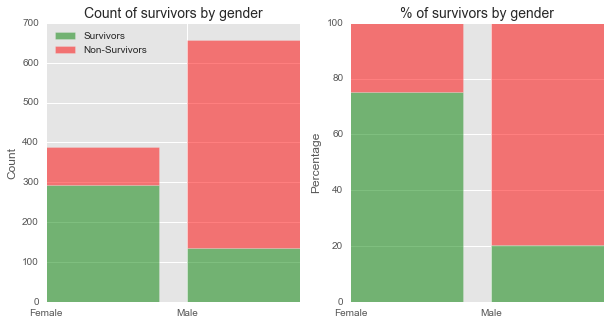

In [17]:
def calculate_percentage(val, total, format_percent = False):
    """Calculates the percentage of a value over a total"""
    #print(val)
    #print(total)
    percent = val/total
    #if format_percent:
        #percent = as_percent(percent)
        
    return percent

survivors_data = data_no_age_nan[data_no_age_nan.survived==True]
non_survivors_data = data_no_age_nan[data_no_age_nan.survived==False]

# calculate values for each survival status
survivors_gender = survivors_data.groupby(['sex']).size().values
#print(survivors_gender)
non_survivors_gender = non_survivors_data.groupby(['sex']).size().values
#print(non_survivors_gender)

# calculate totals for percentates
totals = survivors_gender + non_survivors_gender
#print(totals)

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_gender, totals)*100
#print(data1_percentages)
data2_percentages = calculate_percentage(non_survivors_gender, totals)*100
#print(data2_percentages)
#print(survivors_gender/totals)

gender_categories = ['Female', 'Male']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_gender)), survivors_gender, label='Survivors', alpha=0.5, color='g')
ax1.bar(range(len(non_survivors_gender)), non_survivors_gender, bottom=survivors_gender, label='Non-Survivors', alpha=0.5, color='r')
plt.sca(ax1)
plt.xticks([0, 1], gender_categories )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by gender",fontsize=14)
plt.legend(loc='upper left')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='g')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='r')
plt.sca(ax2)
plt.xticks([0, 1],  gender_categories)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by gender",fontsize=14)

### Investigation of 18 other ship wrecks

In [20]:
ship_wrecks = pd.read_excel("c.xlsx", sheetname=0, header=0,converters={'Age':int})
ship_wrecks.head()
ship_wrecks['Ship Id'] = ship_wrecks['Ship Id'].map({1: 'HMS Birkenhead', 16: 'MS Estonia', 17: 'MS Princess of the Stars', 18: 'MV Bulgaria', 14: 'MV Princess Victoria', 9: 'RMS Empress of Ireland', 10: 'RMS Lusitania', 8: 'RMS Titanic', 15: 'SS Admiral Nakhimov', 2: 'SS Arctic', 5: 'SS Atlantic', 3: 'SS Golden Gate', 13: 'SS Morro Castle', 7: 'SS Norge', 4: 'SS Northfleet', 6: 'SS Princess Alice', 11: 'SS Principessa Mafalda', 12: 'SS Vestris'})
ship_wrecks['Gender'] = ship_wrecks['Gender'].map({1: 'Female', 0: 'Male'})
ship_wrecks.head()

,Id_1,Ship Id,Year,Nationality of the Ship,Women and children first,Quick,Cause,No. of passengers,No. of women passengers,Women passengers/passengers,Ship size,Length of voyage,Gender,Age,Child,Crew,Passenger Class,Nationality of Passenger,Companionship,Survival
0,1,HMS Birkenhead,1852.0,U.K,1.0,1.0,Grounding,490.0,7.0,0.014,554.0,21.0,Male,NaN,.,0,.,.,.,1.0
1,2,HMS Birkenhead,1852.0,U.K,1.0,1.0,Grounding,490.0,7.0,0.014,554.0,21.0,Male,NaN,.,0,.,.,.,1.0
2,3,HMS Birkenhead,1852.0,U.K,1.0,1.0,Grounding,490.0,7.0,0.014,554.0,21.0,Male,NaN,.,0,.,.,.,0.0
3,4,HMS Birkenhead,1852.0,U.K,1.0,1.0,Grounding,490.0,7.0,0.014,554.0,21.0,Male,NaN,.,0,.,.,.,0.0
4,5,HMS Birkenhead,1852.0,U.K,1.0,1.0,Grounding,490.0,7.0,0.014,554.0,21.0,Male,NaN,.,0,.,.,.,1.0


In [21]:
ship_wrecks.dtypes

Id_1                            object
Ship Id                         object
Year                           float64
Nationality of the Ship         object
Women and children first       float64
Quick                          float64
Cause                           object
No. of passengers              float64
No. of women passengers        float64
Women passengers/passengers    float64
Ship size                      float64
Length of voyage               float64
Gender                          object
Age                             object
Child                           object
Crew                            object
Passenger Class                 object
Nationality of Passenger        object
Companionship                   object
Survival                       float64
dtype: object

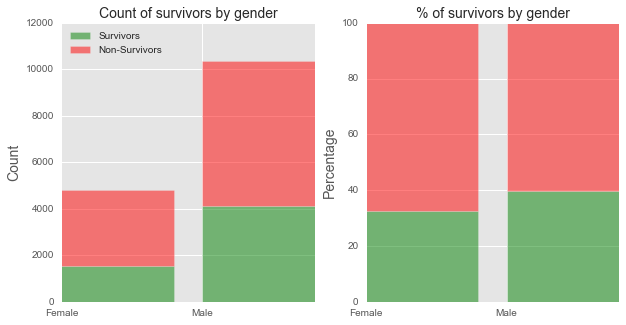

In [22]:
survivors_data_other = ship_wrecks[ship_wrecks.Survival==True]
non_survivors_data_other = ship_wrecks[ship_wrecks.Survival==False]

# calculate values for each survival status
survivors_gender_other = survivors_data_other.groupby(['Gender']).size().values
#print(survivors_gender)
non_survivors_gender_other = non_survivors_data_other.groupby(['Gender']).size().values
#print(non_survivors_gender)

# calculate totals for non_survivors_gender_other
totals = survivors_gender_other + non_survivors_gender_other
#print(totals)

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_gender_other, totals)*100
#print(data1_percentages)
data2_percentages = calculate_percentage(non_survivors_gender_other, totals)*100
#print(data2_percentages)
#print(survivors_gender/totals)

gender_categories = ['Female', 'Male']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_gender_other)), survivors_gender_other, label='Survivors', alpha=0.5, color='g')
ax1.bar(range(len(non_survivors_gender_other)), non_survivors_gender_other, bottom=survivors_gender_other, label='Non-Survivors', alpha=0.5, color='r')
plt.sca(ax1)
plt.xticks([0, 1], gender_categories )
ax1.set_ylabel("Count",fontsize=14)
ax1.set_xlabel("")
ax1.set_title("Count of survivors by gender",fontsize=14)
plt.legend(loc='upper left')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='g')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='r')
plt.sca(ax2)
plt.xticks([0, 1],  gender_categories)
ax2.set_ylabel("Percentage",fontsize=14)
ax2.set_xlabel("")
ax2.set_title("% of survivors by gender",fontsize=14)

In [23]:
survived_prefix = ship_wrecks['Ship Id'][ship_wrecks['Survival']==1].value_counts()
dead_prefix = ship_wrecks['Ship Id'][ship_wrecks['Survival']==0].value_counts()
df_ship_wrecks = pd.DataFrame([survived_prefix,dead_prefix])
df_ship_wrecks.fillna(0, inplace=True)
df_ship_wrecks.index = ['Survived','Dead']
df_ship_wrecks.head()

,HMS Birkenhead,MS Estonia,MS Princess of the Stars,MV Bulgaria,MV Princess Victoria,RMS Empress of Ireland,RMS Lusitania,RMS Titanic,SS Admiral Nakhimov,SS Arctic,SS Atlantic,SS Golden Gate,SS Morro Castle,SS Norge,SS Northfleet,SS Princess Alice,SS Principessa Mafalda,SS Vestris
Survived,191,137,59,76,44,468,768,712,820,42,370,172,412,160,80,177,877,201
Dead,365,852,796,110,135,1014,1193,1496,423,304,578,206,130,635,291,718,309,127


In [24]:
Ship_Id_labels = df_ship_wrecks.columns.values
Ship_Id_labels
Ship_Id_labels_list = np.array(Ship_Id_labels).tolist()
Ship_Id_labels_list

['HMS Birkenhead',
 'MS Estonia',
 'MS Princess of the Stars',
 'MV Bulgaria',
 'MV Princess Victoria',
 'RMS Empress of Ireland',
 'RMS Lusitania',
 'RMS Titanic',
 'SS Admiral Nakhimov',
 'SS Arctic',
 'SS Atlantic',
 'SS Golden Gate',
 'SS Morro Castle',
 'SS Norge',
 'SS Northfleet',
 'SS Princess Alice',
 'SS Principessa Mafalda',
 'SS Vestris']

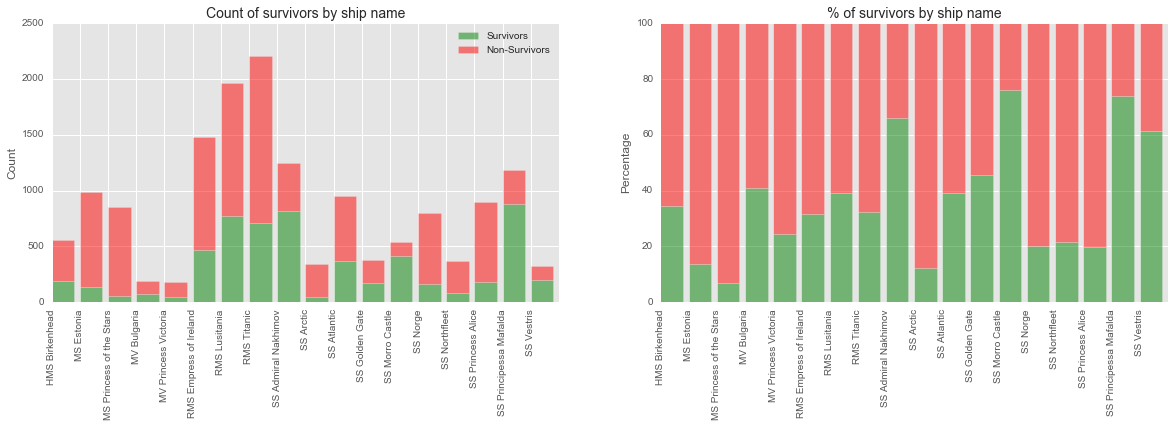

In [25]:
survivors_data = ship_wrecks[ship_wrecks.Survival==True]
non_survivors_data = ship_wrecks[ship_wrecks.Survival==False]

# calculate values for each survival status
survivors_ship_group = survivors_data.groupby(['Ship Id']).size().values
non_survivors_ship_group = non_survivors_data.groupby(['Ship Id']).size().values

# calculate totals for percentates
totals = survivors_ship_group + non_survivors_ship_group

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_ship_group, totals)*100 
data2_percentages = calculate_percentage(non_survivors_ship_group, totals)*100 


tick_spacing = np.array(range(len(Ship_Id_labels)))


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_ship_group)), survivors_ship_group, label='Survivors', alpha=0.5, color='g')
ax1.bar(range(len(non_survivors_ship_group)), non_survivors_ship_group, bottom=survivors_ship_group, label='Non-Survivors', alpha=0.5, color='r')
plt.sca(ax1)
plt.xticks(tick_spacing, Ship_Id_labels, rotation=90 )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by ship name",fontsize=14)
plt.legend(loc='upper right')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='g')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='r')
plt.sca(ax2)
plt.xticks(tick_spacing,  Ship_Id_labels, rotation=90 )
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by ship name",fontsize=14)

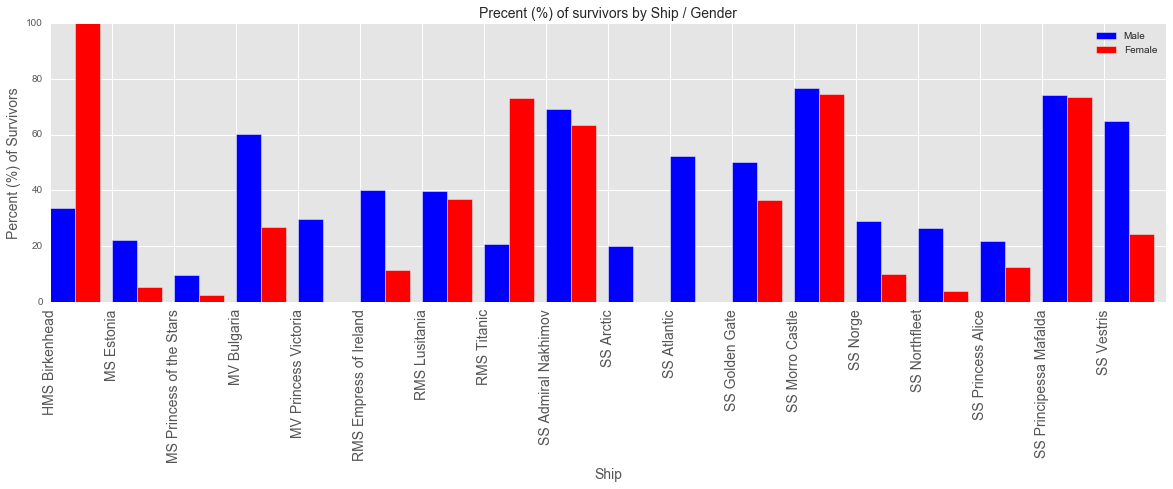

In [26]:
male_data = ship_wrecks[ship_wrecks.Gender == "Male"].groupby('Ship Id').Survival.mean().values*100
female_data = ship_wrecks[ship_wrecks.Gender == "Female"].groupby('Ship Id').Survival.mean().values*100
f, ax = plt.subplots(1, figsize=(20,5))
male_plt_position = np.array(range(len(Ship_Id_labels_list)))
female_plt_position = np.array(range(len(Ship_Id_labels_list)))+0.4
ax.bar(male_plt_position, male_data,width=0.4,label='Male',color='b')
ax.bar(female_plt_position, female_data,width=0.4,label='Female',color='r')
plt.xticks(tick_spacing,  Ship_Id_labels_list, rotation = 90,fontsize=14)
ax.set_ylabel("Percent (%) of Survivors",fontsize=14)
ax.set_xlabel("Ship",fontsize=14)
ax.set_title("Precent (%) of survivors by Ship / Gender",fontsize=14)
plt.legend(loc='best')
plt.show()

## EDA Pclass

In [27]:
pclass_map = {1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'}
data_no_age_nan['pclass'] = data_no_age_nan['pclass'].map(pclass_map)
table = pd.crosstab(data_no_age_nan['survived'],data_no_age_nan['pclass'])
print(table)

pclass    Lower Class  Middle Class  Upper Class
survived                                        
0.0               370           146          103
1.0               131           115          181


In [28]:
print(data_no_age_nan.groupby('pclass').survived.mean())

pclass
Lower Class     0.261477
Middle Class    0.440613
Upper Class     0.637324
Name: survived, dtype: float64


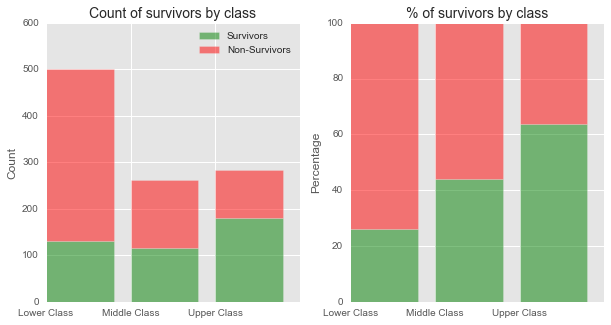

In [29]:
survivors_data = data_no_age_nan[data_no_age_nan.survived==True]
non_survivors_data = data_no_age_nan[data_no_age_nan.survived==False]

# calculate values for each survival status
survivors_class = survivors_data.groupby(['pclass']).size().values
non_survivors_class = non_survivors_data.groupby(['pclass']).size().values

# calculate totals for percentates
totals = survivors_class + non_survivors_class

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_class, totals)*100 
data2_percentages = calculate_percentage(non_survivors_class, totals)*100 



class_categories = ['Lower Class', 'Middle Class', 'Upper Class']


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_class)), survivors_class, label='Survivors', alpha=0.5, color='g')
ax1.bar(range(len(non_survivors_class)), non_survivors_class, bottom=survivors_class, label='Non-Survivors', alpha=0.5, color='r')
plt.sca(ax1)
plt.xticks([0, 1, 2], class_categories )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by class",fontsize=14)
plt.legend(loc='upper right')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='g')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='r')
plt.sca(ax2)
plt.xticks([0, 1, 2],  class_categories)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by class",fontsize=14)

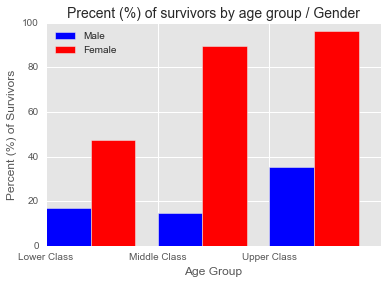

In [30]:
tick_spacing = np.array(range(len(class_categories)))

male_data = data_no_age_nan[data_no_age_nan.sex == "male"].groupby('pclass').survived.mean().values*100
female_data = data_no_age_nan[data_no_age_nan.sex == "female"].groupby('pclass').survived.mean().values*100
ax = plt.subplot()
male_plt_position = np.array(range(len(class_categories)))
female_plt_position = np.array(range(len(class_categories)))+0.4
ax.bar(male_plt_position, male_data,width=0.4,label='Male',color='b')
ax.bar(female_plt_position, female_data,width=0.4,label='Female',color='r')
plt.xticks(tick_spacing,  class_categories)
ax.set_ylabel("Percent (%) of Survivors")
ax.set_xlabel("Age Group")
ax.set_title("Precent (%) of survivors by age group / Gender",fontsize=14)
plt.legend(loc='best')
plt.show()

## EDA Age 

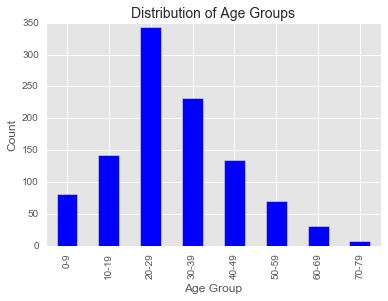

In [31]:
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
data_no_age_nan['age_group'] = pd.cut(data_no_age_nan.age, range(0, 81, 10), right=False, labels=age_labels)
data_no_age_nan.groupby(['age_group']).size().plot(kind='bar',stacked=True, color='b')
plt.title("Distribution of Age Groups",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Age Group');

In [32]:
print(data_no_age_nan.groupby(['age_group']).survived.mean())

age_group
0-9      0.609756
10-19    0.391608
20-29    0.369186
30-39    0.422414
40-49    0.385185
50-59    0.457143
60-69    0.312500
70-79    0.142857
Name: survived, dtype: float64


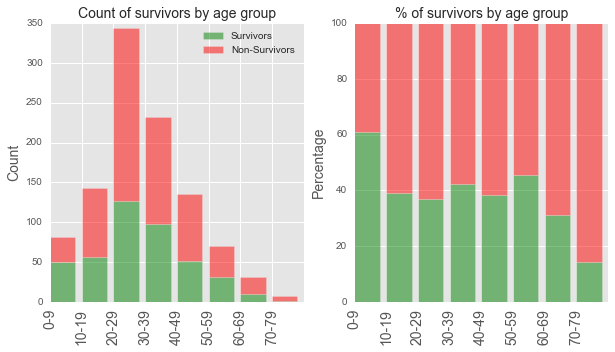

In [33]:
survivors_data = data_no_age_nan[data_no_age_nan.survived==True]
non_survivors_data = data_no_age_nan[data_no_age_nan.survived==False]

# calculate values for each survival status
survivors_age_group = survivors_data.groupby(['age_group']).size().values
non_survivors_age_group = non_survivors_data.groupby(['age_group']).size().values

# calculate totals for percentates
totals = survivors_age_group + non_survivors_age_group

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_age_group, totals)*100 
data2_percentages = calculate_percentage(non_survivors_age_group, totals)*100 


tick_spacing = np.array(range(len(age_labels)))


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_age_group)), survivors_age_group, label='Survivors', alpha=0.5, color='g')
ax1.bar(range(len(non_survivors_age_group)), non_survivors_age_group, bottom=survivors_age_group, label='Non-Survivors', alpha=0.5, color='r')
plt.sca(ax1)
plt.xticks(tick_spacing, age_labels,fontsize=14, rotation = 90 )
ax1.set_ylabel("Count",fontsize=14)
ax1.set_xlabel("")
ax1.set_title("Count of survivors by age group",fontsize=14)
plt.legend(loc='upper right')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='g')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='r')
plt.sca(ax2)
plt.xticks(tick_spacing,  age_labels,fontsize=14, rotation = 90)
ax2.set_ylabel("Percentage",fontsize=14)
ax2.set_xlabel("")
ax2.set_title("% of survivors by age group",fontsize=14)

In [34]:
print(data_no_age_nan.groupby(['sex','age_group']).survived.mean())

sex     age_group
female  0-9          0.641026
        10-19        0.734375
        20-29        0.713043
        30-39        0.790698
        40-49        0.782609
        50-59        0.925926
        60-69        0.800000
        70-79        1.000000
male    0-9          0.581395
        10-19        0.113924
        20-29        0.196507
        30-39        0.205479
        40-49        0.179775
        50-59        0.162791
        60-69        0.090909
        70-79        0.000000
Name: survived, dtype: float64


[ 58.13953488  11.39240506  19.65065502  20.54794521  17.97752809
  16.27906977   9.09090909   0.        ]


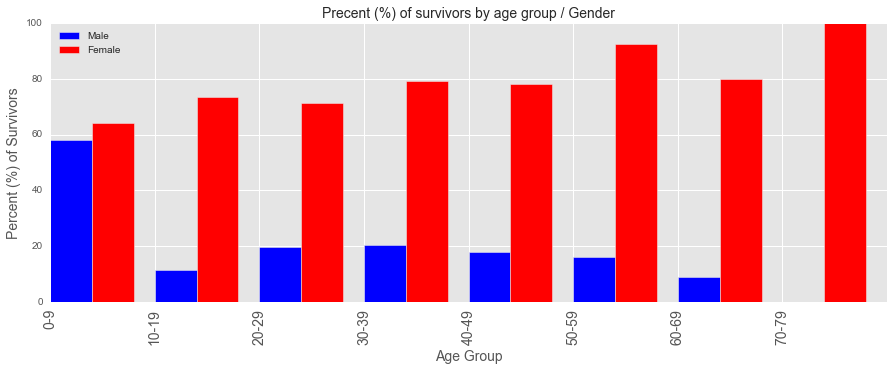

In [35]:
male_data = data_no_age_nan[data_no_age_nan.sex == "male"].groupby('age_group').survived.mean().values*100
female_data = data_no_age_nan[data_no_age_nan.sex == "female"].groupby('age_group').survived.mean().values*100
print(male_data)
f, ax = plt.subplots(1, figsize=(15,5))
male_plt_position = np.array(range(len(age_labels)))
female_plt_position = np.array(range(len(age_labels)))+0.4
ax.bar(male_plt_position, male_data,width=0.4,label='Male',color='b')
ax.bar(female_plt_position, female_data,width=0.4,label='Female',color='r')
plt.xticks(tick_spacing,  age_labels,fontsize=14, rotation = 90)
ax.set_ylabel("Percent (%) of Survivors",fontsize=14)
ax.set_xlabel("Age Group",fontsize=14)
ax.set_title("Precent (%) of survivors by age group / Gender",fontsize=14)
plt.legend(loc='best')
plt.show()

## EDA Name

In [36]:
data_no_age_nan.describe(include = "all")

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,lastname,firstname,prefix,age_group
count,1046,1046.000000,1046,1046,1046.000000,1046.000000,1046.00000,1046,1045.000000,272,1044,417,120.00000,685,1046,1046,1046,1045
unique,3,NaN,1044,2,NaN,NaN,NaN,732,NaN,174,3,26,NaN,348,699,943,18,8
top,Lower Class,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA 2144,NaN,C23 C25 C27,S,15,NaN,"New York, NY",Andersson,William,Mr,20-29
freq,501,NaN,2,658,NaN,NaN,NaN,8,NaN,6,782,34,NaN,55,11,9,581,344
mean,NaN,0.408222,NaN,NaN,29.881135,0.502868,0.42065,NaN,36.686080,NaN,NaN,NaN,160.87500,NaN,NaN,NaN,NaN,NaN
std,NaN,0.491740,NaN,NaN,14.413500,0.912167,0.83975,NaN,55.732533,NaN,NaN,NaN,98.10392,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.166700,0.000000,0.00000,NaN,0.000000,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,NaN,NaN,21.000000,0.000000,0.00000,NaN,8.050000,NaN,NaN,NaN,71.50000,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.000000,NaN,NaN,28.000000,0.000000,0.00000,NaN,15.750000,NaN,NaN,NaN,155.50000,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,NaN,NaN,39.000000,1.000000,1.00000,NaN,35.500000,NaN,NaN,NaN,256.50000,NaN,NaN,NaN,NaN,NaN


In [37]:
print(data_no_age_nan.groupby(['prefix','survived']).survived.mean())

prefix         survived
 Capt          0.0         0.0
 Col           0.0         0.0
               1.0         1.0
 Don           0.0         0.0
 Dona          1.0         1.0
 Dr            0.0         0.0
               1.0         1.0
 Jonkheer      0.0         0.0
 Lady          1.0         1.0
 Major         0.0         0.0
               1.0         1.0
 Master        0.0         0.0
               1.0         1.0
 Miss          0.0         0.0
               1.0         1.0
 Mlle          1.0         1.0
 Mme           1.0         1.0
 Mr            0.0         0.0
               1.0         1.0
 Mrs           0.0         0.0
               1.0         1.0
 Ms            1.0         1.0
 Rev           0.0         0.0
 Sir           1.0         1.0
 the Countess  1.0         1.0
Name: survived, dtype: float64


In [38]:
survived_prefix = data_no_age_nan['prefix'][data_no_age_nan['survived']==1].value_counts()
dead_prefix = data_no_age_nan['prefix'][data_no_age_nan['survived']==0].value_counts()
df = pd.DataFrame([survived_prefix,dead_prefix])
df.fillna(0, inplace=True)
df.index = ['Survived','Dead']
df.head()

,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,0.0,2.0,0.0,1.0,4.0,0.0,1.0,1.0,28.0,146.0,2.0,1.0,100.0,138.0,1.0,0.0,1.0,1.0
Dead,1.0,2.0,1.0,0.0,3.0,1.0,0.0,1.0,25.0,64.0,0.0,0.0,481.0,32.0,0.0,8.0,0.0,0.0


In [39]:
survivors_prefix = df.loc['Survived'].values
non_survivors_prefix = df.loc['Dead'].values

# calculate totals for percentates
totals = survivors_prefix + non_survivors_prefix
print(totals)

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_prefix, totals)*100 
data2_percentages = calculate_percentage(non_survivors_prefix, totals)*100 

[   1.    4.    1.    1.    7.    1.    1.    2.   53.  210.    2.    1.
  581.  170.    1.    8.    1.    1.]


[' Capt' ' Col' ' Don' ' Dona' ' Dr' ' Jonkheer' ' Lady' ' Major' ' Master'
 ' Miss' ' Mlle' ' Mme' ' Mr' ' Mrs' ' Ms' ' Rev' ' Sir' ' the Countess']


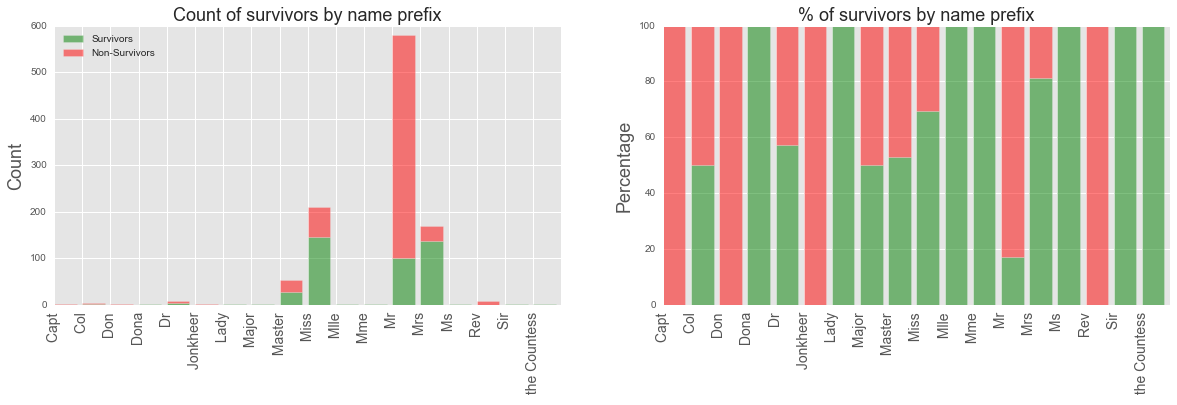

In [40]:
prefix_labels = df.columns.values
print(prefix_labels)
tick_spacing = np.array(range(len(prefix_labels)))


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_prefix)), survivors_prefix, label='Survivors', alpha=0.5, color='g')
ax1.bar(range(len(non_survivors_prefix)), non_survivors_prefix, bottom=survivors_prefix, label='Non-Survivors', alpha=0.5, color='r')
plt.sca(ax1)
plt.xticks(tick_spacing, prefix_labels, rotation = 90,fontsize=14)
ax1.set_ylabel("Count",fontsize=18)
ax1.set_xlabel("",fontsize=18)
ax1.set_title("Count of survivors by name prefix",fontsize=18)
plt.legend(loc='upper left')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='g')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='r')
plt.sca(ax2)
plt.xticks(tick_spacing,  prefix_labels, rotation = 90,fontsize=14)
ax2.set_ylabel("Percentage",fontsize=18)
ax2.set_xlabel("",fontsize=18)
ax2.set_title("% of survivors by name prefix",fontsize=18)

In [41]:
data_no_age_nan_age_prefix = data_no_age_nan[['age', 'survived', 'prefix']].copy()
data_no_age_nan_age_prefix.head()

,age,survived,prefix
0,29.0000,1.0,Miss
1,0.9167,1.0,Master
2,2.0000,0.0,Miss
3,30.0000,0.0,Mr
4,25.0000,0.0,Mrs


# *EDA FOR SIBSP, PARCH, TICKET, FARE, AND CABIN*

- a ticket ID can be shared amongst passengers traveling together, and the fare is likely the total amount for that group ticket
  * fare needs to be normalized by the number of passengers with that ticket
  
  
- split cabin into just a few categories
- look at distribution of cabin for different groups
* How do we 'rank' cabin location?


- assuming that not having a body id number means the body wasn't found


- for validation within the data, we should check the fares of each cabin group and of each 'pclass'
 * seems to make sense
 
 
* Did small families have more survivability?
* What do we do about individuals for whom fare was 0?

In [54]:
plt.style.use('ggplot')
titanic = pd.read_excel('titanic3.xls')

In [55]:
titanic['ticket'] = titanic['ticket'].astype(str)

In [56]:
titanic.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [57]:
titanic.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


* The highest correlation is between fare and survival.

# sibsp EDA

In [58]:
titanic["sibsp"].describe()

count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: sibsp, dtype: float64

In [59]:
titanic['sibsp'].isnull().sum()

0

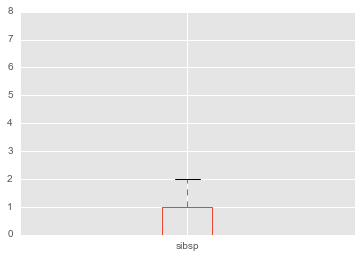

In [60]:
titanic.boxplot('sibsp', return_type='axes')

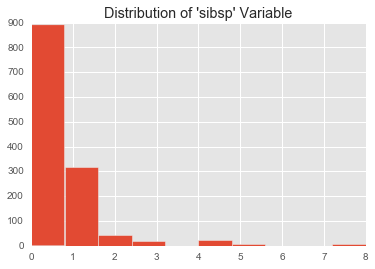

In [61]:
plt.figure()
titanic.hist('sibsp')
plt.title("Distribution of 'sibsp' Variable")

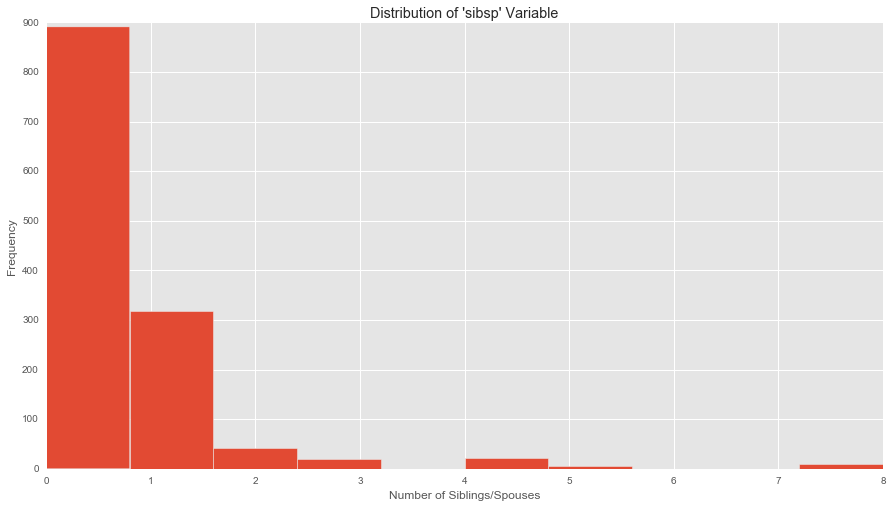

In [62]:
figure = plt.figure(figsize=(15,8))
plt.hist(titanic['sibsp'])

plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Frequency')
plt.title("Distribution of 'sibsp' Variable")

In [63]:
titanic["sibsp"].value_counts(sort=False)

0    891
1    319
2     42
3     20
4     22
5      6
8      9
Name: sibsp, dtype: int64

In [64]:
titanic.groupby('sibsp').\
agg({'pclass':[np.mean, np.std], 'survived':[np.mean, np.std], \
     'age':[np.mean, np.std], 'parch':[np.mean, np.std], 'fare':[np.mean, np.std]})

pclass                  age                parch            survived  \
           mean       std       mean        std      mean       std      mean   
sibsp                                                                           
0      2.351291  0.820418  30.921776  13.059729  0.181818  0.575282  0.346801   
1      2.034483  0.862607  31.058036  15.974550  0.717868  1.234474  0.510972   
2      2.333333  0.786057  23.569444  14.910640  0.571429  0.830599  0.452381   
3      2.550000  0.825578  16.312500  11.824938  1.250000  0.716350  0.300000   
4      3.000000  0.000000   8.772727   8.005545  1.545455  0.509647  0.136364   
5      3.000000  0.000000  10.166667   5.192944  2.000000  0.000000  0.000000   
8      3.000000  0.000000  14.500000        NaN  2.000000  0.000000  0.000000   

                      fare             
            std       mean        std  
sibsp                                  
0      0.476219  25.785406  49.359631  
1      0.500665  48.711300  50.137987  
2      0.503761  48.940576  64.842521  
3      0.470162  71.332090  98.380693  
4      0.351250  30.594318   8.350380  
5      0.000000  46.900000   0.000000  
8      0.000000  69.550000   0.000000

In [65]:
titanic[titanic['sibsp'] == 5]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
825,3,0,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
826,3,0,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
827,3,0,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
828,3,0,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
829,3,0,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
830,3,0,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"


In [66]:
titanic[titanic['sibsp'] == 8]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1170,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1171,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,NaN,67.0,NaN
1172,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1173,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1174,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1175,3,0,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1176,3,0,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1177,3,0,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1178,3,0,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN


* No indications that there is an issue with data integrity.
* Most passengers did not have siblings or spouses aboard, and the ones that did generally just had one sibling or spouse aboard.
* The 6 individuals for whom there were 5 siblings/spouses were a family unit.  The 9 individuals for whom there were 8 siblings/spouses were a family unit.  This is also indicated by the value of 2 for 'parch' for those groups.
 * These large families were in the lowest class and did not survive.
 * The reason that there is a NaN value for the standard deviation of age in the case of sibsp=8 is because the age is known for only one individual in that group.

# parch EDA

In [68]:
titanic["parch"].describe()

count    1309.000000
mean        0.385027
std         0.865560
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: parch, dtype: float64

In [69]:
titanic['parch'].isnull().sum()

0

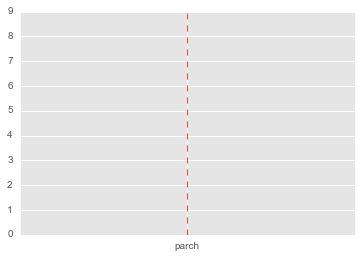

In [70]:
titanic.boxplot('parch', return_type='axes')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c1d45f8>]], dtype=object)

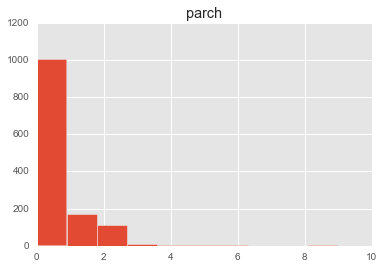

In [71]:
titanic.hist('parch')

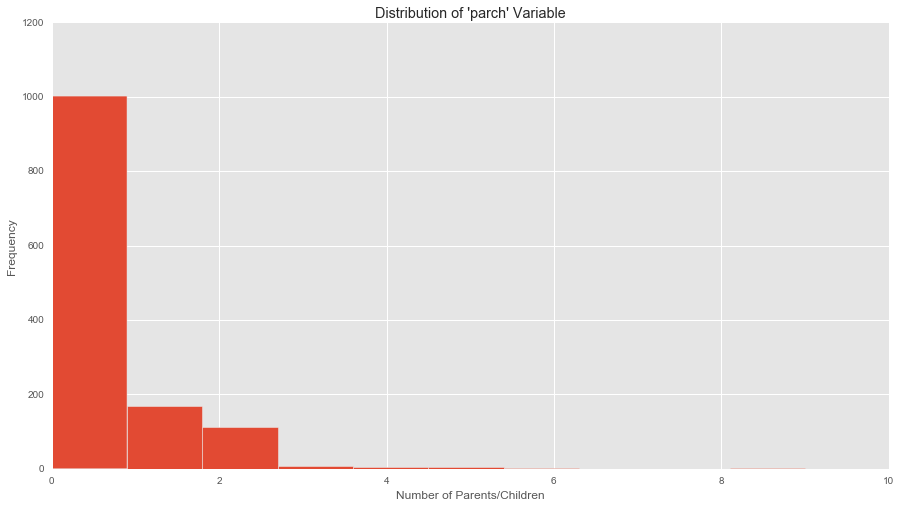

In [72]:
figure = plt.figure(figsize=(15,8))
plt.hist(titanic['parch'])

plt.xlabel('Number of Parents/Children')
plt.ylabel('Frequency')
plt.title("Distribution of 'parch' Variable")

In [73]:
titanic["parch"].value_counts(sort=False)

0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: parch, dtype: int64

In [74]:
titanic.groupby('parch').\
agg({'pclass':[np.mean, np.std], 'survived':[np.mean, np.std], \
     'age':[np.mean, np.std], 'sibsp':[np.mean, np.std], 'fare':[np.mean, np.std]})

pclass                  age                   fare              \
           mean       std       mean        std        mean         std   
parch                                                                     
0      2.311377  0.835555  31.969401  12.422617   26.329820   42.254229   
1      2.158824  0.852118  24.965625  18.410886   50.078358   70.617919   
2      2.300885  0.833291  18.975945  14.564109   61.346275   65.017590   
3      2.125000  0.834523  38.875000  16.295815   86.688537  108.692086   
4      2.333333  1.032796  47.600000  14.432602  104.723617  122.625701   
5      3.000000  0.000000  39.333333   1.032796   32.356250    3.698739   
6      3.000000  0.000000  41.500000   2.121320   46.900000    0.000000   
9      3.000000  0.000000        NaN        NaN   69.550000    0.000000   

       survived               sibsp            
           mean       std      mean       std  
parch                                          
0      0.335329  0.472341  0.243513  0.504310  
1      0.588235  0.493607  1.029412  1.051494  
2      0.504425  0.502208  1.902655  2.379093  
3      0.625000  0.517549  0.875000  0.640870  
4      0.166667  0.408248  0.666667  0.516398  
5      0.166667  0.408248  0.666667  0.516398  
6      0.000000  0.000000  1.000000  0.000000  
9      0.000000  0.000000  1.000000  0.000000

In [75]:
titanic[titanic['parch'] == 6]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
831,3,0,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
832,3,0,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"


In [76]:
titanic[titanic['parch'] == 9]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1179,3,0,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1180,3,0,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.55,NaN,S,NaN,NaN,NaN


* There is nothing that indicates an issue with data integrity, except for the missing ages of the parents of the largest family.
* Most passengers did not have parents or children onboard, which means there were relatively few families.
  * There are many combinations of one parent - one child, two parents - one child, one parent - two children, that could contribute to the high counts of 1 and 2 'parch'.
* The counts of 2 for 'parch' values of 6 and 9 are consistent with the observations regarding 'sibsp'.
* Again, we see that the largest families were in the lowest class and did not survive.
* The reason why the mean and standard deviation of the age is NaN for 'parch'== 9 is because the ages of the two individuals in this group (the parents) are unknown.

# ticket EDA

In [77]:
titanic["ticket"].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: ticket, dtype: object

In [78]:
titanic['ticket'].isnull().sum()

0

In [79]:
pd.DataFrame(titanic["ticket"].value_counts(ascending=False))

,ticket
CA. 2343,11
CA 2144,8
1601,8
S.O.C. 14879,7
PC 17608,7
347082,7
347077,7
3101295,7
113781,6
347088,6


In [80]:
pd.DataFrame(titanic.groupby('ticket')['fare'].std())

,fare
ticket,
110152,0.0
110413,0.0
110465,0.0
110469,NaN
110489,NaN
110564,NaN
110813,0.0
111163,NaN
111240,NaN


In [81]:
ticketAndFare = pd.DataFrame(titanic["ticket"].value_counts(ascending=False)).join(pd.DataFrame(titanic.groupby('ticket')['fare'].std()))
ticketAndFare.columns = ["Group Size", "Standard Deviation of 'fare'"]
ticketAndFare.head()

,Group Size,Standard Deviation of 'fare'
CA. 2343,11,0.0
CA 2144,8,0.0
1601,8,0.0
S.O.C. 14879,7,0.0
PC 17608,7,0.0


* There is nothing that indicates an issue with data integrity.
* The fact that ticket IDs aren't unique showed that groups traveling together might have the same ticket ID, and that the fare might be the total cost of that group ticket.
* Boxplot and histogram won't say much about the ticket IDs, since they are actually categorical.
* The large family with 9 children is on ticket CA. 2343.  The large family with 6 children is on ticket CA 2144 or 1601.  The fact that there are multiple tickets with a value count > 6 means there were multiple large groups that were not families.
* Ticket IDs have different lengths and some have string prefixes... what do those mean?
* For further analysis: group ticket IDs by value count and then examine each group size.

# fare EDA

In [82]:
titanic["fare"].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [83]:
titanic['fare'].isnull().sum()

1

In [84]:
titanic[titanic['fare'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN


In [85]:
titanic[titanic['ticket']=='3701']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN


In [86]:
(titanic["fare"] == 0).sum()

17

In [87]:
titanic[titanic["fare"] == 0]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,NaN,NaN,"Belfast, NI"
70,1,0,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S,NaN,NaN,"Liverpool, England / Belfast"
125,1,0,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S,NaN,NaN,NaN
150,1,0,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,NaN,110.0,NaN
170,1,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S,C,NaN,Liverpool
223,1,0,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,NaN,NaN,Belfast
234,1,0,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,NaN,NaN,"Rotterdam, Netherlands"
363,2,0,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,NaN,NaN,Belfast
384,2,0,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,NaN,NaN,Belfast
410,2,0,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,NaN,NaN,Belfast


In [88]:
#summary statistics of fares > 0
titanic[titanic["fare"] > 0]["fare"].describe()

count    1291.000000
mean       33.733917
std        51.956349
min         3.170800
25%         7.925000
50%        14.500000
75%        31.331250
max       512.329200
Name: fare, dtype: float64

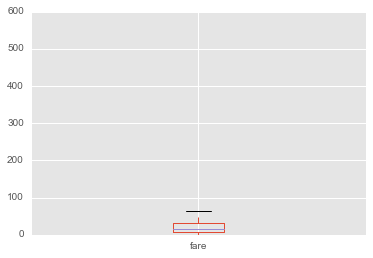

In [89]:
titanic.boxplot('fare', return_type='axes')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d008550>]], dtype=object)

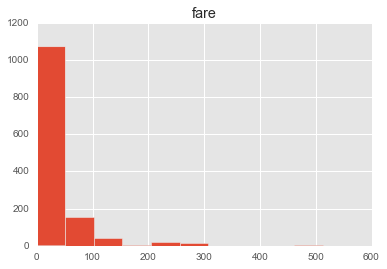

In [90]:
titanic.hist('fare')

In [91]:
titanic["fare"].value_counts(ascending=False).head()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
Name: fare, dtype: int64

In [92]:
(titanic["fare"] > 400).sum()

4

In [93]:
def fare_checker(fare):
    if np.isnan(fare):
        return True
    elif fare == 0.0:
        return True
    else:
        return False

ticketGroupStd = titanic.groupby('ticket').std()
ticketGroupStd["fare_check"] = ticketGroupStd["fare"].apply(fare_checker)
ticketGroupStd["fare_check"].describe()

count      929
unique       2
top       True
freq       928
Name: fare_check, dtype: object

In [94]:
ticketGroupStd[ticketGroupStd["fare_check"] == False]

,pclass,survived,age,sibsp,parch,fare,body,fare_check
ticket,,,,,,,,
7534,0.0,0.0,2.828427,0.0,0.0,0.444841,NaN,False


In [95]:
titanic[titanic['ticket'] == '7534']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
836,3,0,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S,NaN,NaN,"Waukegan, Chicago, IL"
1093,3,0,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,NaN,S,NaN,NaN,NaN


* Data integrity issues:
 * There are 17 individuals for whom the fare was 0.
   *  Free ticket?
 * The ticket group '7534' has different fares listed for its two members.  Also, there is a very high maximum fare.
* Most values are clustered at 0-50.
 * There are 4 'groups' with a total fare greater than 400.

# Transformations

In [96]:
titanic["ticket"].value_counts().to_dict()

{'110152': 3,
 '110413': 3,
 '110465': 2,
 '110469': 1,
 '110489': 1,
 '110564': 1,
 '110813': 2,
 '111163': 1,
 '111240': 1,
 '111320': 1,
 '111361': 2,
 '111369': 1,
 '111426': 1,
 '111427': 1,
 '111428': 1,
 '112050': 1,
 '112051': 1,
 '112052': 1,
 '112053': 1,
 '112058': 2,
 '112059': 1,
 '112277': 1,
 '112377': 1,
 '112378': 2,
 '112379': 1,
 '112901': 1,
 '113028': 1,
 '113038': 1,
 '113043': 1,
 '113044': 1,
 '113050': 1,
 '113051': 1,
 '113054': 1,
 '113055': 1,
 '113056': 1,
 '113059': 2,
 '113501': 1,
 '113503': 5,
 '113505': 2,
 '113509': 2,
 '113510': 1,
 '113514': 1,
 '113572': 2,
 '113760': 4,
 '113767': 1,
 '113773': 2,
 '113776': 2,
 '113778': 1,
 '113780': 1,
 '113781': 6,
 '113783': 1,
 '113784': 1,
 '113786': 1,
 '113787': 1,
 '113788': 1,
 '113789': 2,
 '113790': 1,
 '113791': 1,
 '113792': 1,
 '113794': 1,
 '113795': 1,
 '113796': 2,
 '113798': 2,
 '113800': 1,
 '113801': 1,
 '113803': 2,
 '113804': 1,
 '113806': 2,
 '113807': 1,
 '11668': 2,
 '11751': 2,
 '11752'

In [97]:
transformedTitanic = titanic.copy()
ticketCounts = titanic["ticket"].value_counts().to_dict()
transformedTitanic["ticket_counts"] = transformedTitanic["ticket"].apply(lambda x: ticketCounts[x])
transformedTitanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,ticket_counts
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",4
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",6
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",6
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",6
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",6
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",1
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",3
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",1
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",2
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",1


In [98]:
(titanic["ticket"] == 'PC 17757').sum()

5

In [99]:
transformedTitanic["individual_fare"] = transformedTitanic["fare"] / transformedTitanic["ticket_counts"]
transformedTitanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,ticket_counts,individual_fare
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",4,52.834375
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",6,25.258333
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",6,25.258333
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",6,25.258333
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",6,25.258333
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",1,26.550000
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",3,25.986100
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",1,0.000000
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",2,25.739600
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",1,49.504200


## EDA for 'individual_fare'

In [101]:
transformedTitanic.corr()

,pclass,survived,age,sibsp,parch,fare,body,ticket_counts,individual_fare
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642,-0.078554,-0.770976
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN,0.075293,0.265662
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809,-0.185285,0.361767
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961,0.679444,-0.050984
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099,0.647029,-0.030577
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110,0.478940,0.819868
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000,-0.042707,0.014098
ticket_counts,-0.078554,0.075293,-0.185285,0.679444,0.647029,0.478940,-0.042707,1.000000,0.094068
individual_fare,-0.770976,0.265662,0.361767,-0.050984,-0.030577,0.819868,0.014098,0.094068,1.000000


In [102]:
transformedTitanic[transformedTitanic["individual_fare"] > 0].groupby("pclass").agg({'individual_fare':[np.mean, np.std]})

individual_fare           
                  mean        std
pclass                           
1            34.661682  14.675124
2            11.663652   2.031927
3             7.370788   1.367423

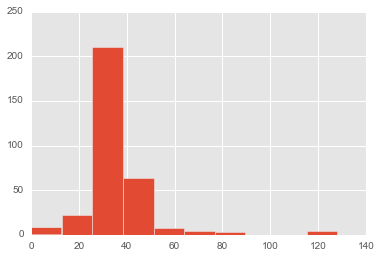

In [103]:
transformedTitanic[transformedTitanic['pclass'] == 1].individual_fare.hist()

In [104]:
transformedTitanic[transformedTitanic['pclass'] == 1].individual_fare.describe()

count    323.000000
mean      33.910500
std       15.369762
min        0.000000
25%       26.550000
50%       29.700000
75%       38.643750
max      128.082300
Name: individual_fare, dtype: float64

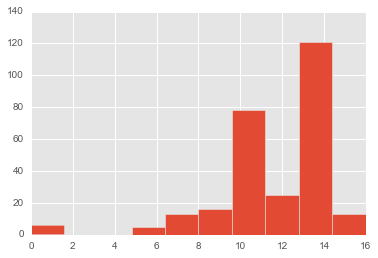

In [105]:
transformedTitanic[transformedTitanic['pclass'] == 2].individual_fare.hist()

In [106]:
transformedTitanic[transformedTitanic['pclass'] == 2].individual_fare.describe()

count    277.00000
mean      11.41101
std        2.63293
min        0.00000
25%       10.50000
50%       12.35000
75%       13.00000
max       16.00000
Name: individual_fare, dtype: float64

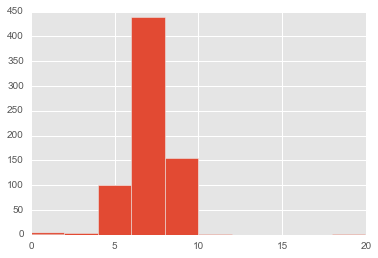

In [107]:
transformedTitanic[transformedTitanic['pclass'] == 3].individual_fare.hist()

In [108]:
transformedTitanic[transformedTitanic['pclass'] == 3].individual_fare.describe()

count    708.000000
mean       7.329146
std        1.471362
min        0.000000
25%        7.060031
50%        7.750000
75%        7.925000
max       19.966700
Name: individual_fare, dtype: float64

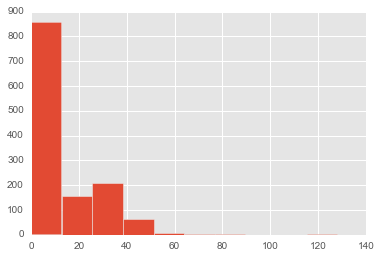

In [109]:
transformedTitanic["individual_fare"].hist()

* High max fare for pclass = 3
* Considered binning the individual fare, but perhaps that is the same as pclass-- high correlation (-0.706535) between pclass and individual_fare.

In [110]:
errorCheck = transformedTitanic.groupby('ticket')['individual_fare'].apply(lambda x: np.std(x))
errorCheck = errorCheck.round(decimals=6)
errorCheck

ticket
110152               0.0
110413               0.0
110465               0.0
110469               0.0
110489               0.0
110564               0.0
110813               0.0
111163               0.0
111240               0.0
111320               0.0
111361               0.0
111369               0.0
111426               0.0
111427               0.0
111428               0.0
112050               0.0
112051               0.0
112052               0.0
112053               0.0
112058               0.0
112059               0.0
112277               0.0
112377               0.0
112378               0.0
112379               0.0
112901               0.0
113028               0.0
113038               0.0
113043               0.0
113044               0.0
                    ... 
STON/O 2. 3101273    0.0
STON/O 2. 3101274    0.0
STON/O 2. 3101275    0.0
STON/O 2. 3101280    0.0
STON/O 2. 3101285    0.0
STON/O 2. 3101286    0.0
STON/O 2. 3101288    0.0
STON/O 2. 3101289    0.0
STON/O 2. 3101291 

In [111]:
(errorCheck == 0).sum()

927

In [112]:
errorCheck.isnull().sum()

1

In [113]:
errorCheck[errorCheck.isnull()]

ticket
3701   NaN
Name: individual_fare, dtype: float64

In [114]:
transformedTitanic[transformedTitanic['ticket'] == '3701']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,ticket_counts,individual_fare
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN,1,NaN


In [115]:
(errorCheck > 0).sum()

1

In [116]:
errorCheck[errorCheck>0]

ticket
7534    0.157275
Name: individual_fare, dtype: float64

In [117]:
transformedTitanic[transformedTitanic['ticket'] == '7534']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,ticket_counts,individual_fare
836,3,0,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S,NaN,NaN,"Waukegan, Chicago, IL",2,4.92290
1093,3,0,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,NaN,S,NaN,NaN,NaN,2,4.60835


In [118]:
transformedTitanic['individual_fare'].describe()

count    1308.000000
mean       14.757627
std        13.555638
min         0.000000
25%         7.550000
50%         8.050000
75%        15.008325
max       128.082300
Name: individual_fare, dtype: float64

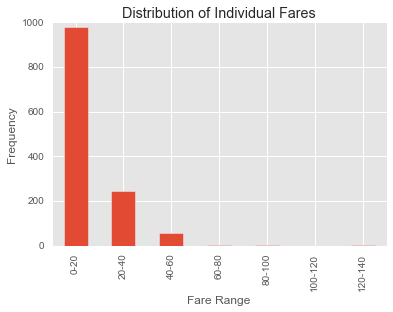

In [119]:
fareBins = [0,20,40,60,80,100,120,140]
fareLabels = ['0-20','20-40','40-60','60-80','80-100','100-120','120-140']
fareType = pd.cut(transformedTitanic['individual_fare'], fareBins, labels=fareLabels).astype('category')
plt.figure()
farePlot = fareType.value_counts(sort=False).plot(x='fare range', y='frequency',kind='bar')
plt.xlabel('Fare Range')
plt.ylabel('Frequency')
plt.title('Distribution of Individual Fares')

In [120]:
fareType.value_counts(sort=False)

0-20       980
20-40      244
40-60       56
60-80        4
80-100       3
100-120      0
120-140      4
Name: individual_fare, dtype: int64

In [121]:
transformedTitanic[(transformedTitanic['individual_fare']>60) & (transformedTitanic['survived']==0)] 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,ticket_counts,individual_fare
16,1,0,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,NaN,NaN,"Montreal, PQ",3,82.506933
71,1,0,"Clark, Mr. Walter Miller",male,27.0,1,0,13508,136.7792,C89,C,NaN,NaN,"Los Angeles, CA",2,68.389600


In [122]:
transformedTitanic[transformedTitanic['individual_fare']>80]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,ticket_counts,individual_fare
16,1,0,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,NaN,NaN,"Montreal, PQ",3,82.506933
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ",3,82.506933
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA",4,128.082300
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA",4,128.082300
97,1,1,"Douglas, Mrs. Frederick Charles (Mary Helene B...",female,27.0,1,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ",3,82.506933
183,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,3,NaN,NaN,4,128.082300
302,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,3,NaN,NaN,4,128.082300


In [123]:
transformedTitanic[transformedTitanic['ticket']=='24160']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,ticket_counts,individual_fare
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",4,52.834375
180,1,1,"Kreuchen, Miss. Emilie",female,39.0,0,0,24160,211.3375,NaN,S,2,NaN,NaN,4,52.834375
193,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S,2,NaN,"St Louis, MO",4,52.834375
238,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S,2,NaN,"St Louis, MO",4,52.834375


In [124]:
transformedTitanic[transformedTitanic['ticket']=='CA. 2343']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,ticket_counts,individual_fare
1170,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,11,6.322727
1171,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,NaN,67.0,NaN,11,6.322727
1172,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,11,6.322727
1173,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,11,6.322727
1174,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,11,6.322727
1175,3,0,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,11,6.322727
1176,3,0,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,11,6.322727
1177,3,0,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,11,6.322727
1178,3,0,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,11,6.322727
1179,3,0,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,11,6.322727


## Re-aggregation of statistics for 'sibsp' and 'parch', with 'individual_fare' included

In [125]:
transformedTitanic.groupby('sibsp').\
agg({'pclass':[np.mean, np.std], 'survived':[np.mean, np.std], \
     'age':[np.mean, np.std], 'parch':[np.mean, np.std], 'individual_fare':[np.mean, np.std]})

individual_fare               pclass                  age             \
                 mean        std      mean       std       mean        std   
sibsp                                                                        
0           14.147095  13.451447  2.351291  0.820418  30.921776  13.059729   
1           17.766906  13.942270  2.034483  0.862607  31.058036  15.974550   
2           13.650660  12.387889  2.333333  0.786057  23.569444  14.910640   
3           13.296668  15.759201  2.550000  0.825578  16.312500  11.824938   
4            5.139908   0.998131  3.000000  0.000000   8.772727   8.005545   
5            5.862500   0.000000  3.000000  0.000000  10.166667   5.192944   
8            6.322727   0.000000  3.000000  0.000000  14.500000        NaN   

          parch            survived            
           mean       std      mean       std  
sibsp                                          
0      0.181818  0.575282  0.346801  0.476219  
1      0.717868  1.234474  0.510972  0.500665  
2      0.571429  0.830599  0.452381  0.503761  
3      1.250000  0.716350  0.300000  0.470162  
4      1.545455  0.509647  0.136364  0.351250  
5      2.000000  0.000000  0.000000  0.000000  
8      2.000000  0.000000  0.000000  0.000000

In [126]:
transformedTitanic.groupby('parch').\
agg({'pclass':[np.mean, np.std], 'survived':[np.mean, np.std], \
     'age':[np.mean, np.std], 'sibsp':[np.mean, np.std], 'individual_fare':[np.mean, np.std]})

pclass                  age            individual_fare             \
           mean       std       mean        std            mean        std   
parch                                                                        
0      2.311377  0.835555  31.969401  12.422617       14.660890  12.469626   
1      2.158824  0.852118  24.965625  18.410886       16.707919  19.303694   
2      2.300885  0.833291  18.975945  14.564109       13.336088  12.119067   
3      2.125000  0.834523  38.875000  16.295815       15.128608  13.953547   
4      2.333333  1.032796  47.600000  14.432602       17.712501  20.235016   
5      3.000000  0.000000  39.333333   1.032796        4.737897   0.480939   
6      3.000000  0.000000  41.500000   2.121320        5.862500   0.000000   
9      3.000000  0.000000        NaN        NaN        6.322727   0.000000   

       survived               sibsp            
           mean       std      mean       std  
parch                                          
0      0.335329  0.472341  0.243513  0.504310  
1      0.588235  0.493607  1.029412  1.051494  
2      0.504425  0.502208  1.902655  2.379093  
3      0.625000  0.517549  0.875000  0.640870  
4      0.166667  0.408248  0.666667  0.516398  
5      0.166667  0.408248  0.666667  0.516398  
6      0.000000  0.000000  1.000000  0.000000  
9      0.000000  0.000000  1.000000  0.000000

## Name Parsing for Analysis of Families vs Groups vs Individuals

In [127]:
def get_last_name(name):
    names = name.split(',')
    return names[0]

In [128]:
transformedTitanic['last_name'] = transformedTitanic['name'].apply(get_last_name)
transformedTitanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,ticket_counts,individual_fare,last_name
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",4,52.834375,Allen
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",6,25.258333,Allison
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",6,25.258333,Allison
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",6,25.258333,Allison
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",6,25.258333,Allison
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",1,26.550000,Anderson
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",3,25.986100,Andrews
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",1,0.000000,Andrews
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",2,25.739600,Appleton
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",1,49.504200,Artagaveytia


In [129]:
transformedTitanic['last_name'].describe()

count     1309
unique     875
top       Sage
freq        11
Name: last_name, dtype: object

In [130]:
transformedTitanic[transformedTitanic['last_name'] == 'Sage']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,ticket_counts,individual_fare,last_name
1170,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,11,6.322727,Sage
1171,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,NaN,67.0,NaN,11,6.322727,Sage
1172,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,11,6.322727,Sage
1173,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,11,6.322727,Sage
1174,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,11,6.322727,Sage
1175,3,0,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,11,6.322727,Sage
1176,3,0,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,11,6.322727,Sage
1177,3,0,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,11,6.322727,Sage
1178,3,0,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,11,6.322727,Sage
1179,3,0,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,11,6.322727,Sage


## Families vs Other Groups vs Individuals
* Did families survive more effectively than individuals?
* Did small families have more survivability?
* Split groups by ‘families’ and ‘friends’-- did families survive better than other groups?

In [131]:
lastNameCount = pd.DataFrame(transformedTitanic.groupby('ticket')['last_name'].nunique())
groupSize = pd.DataFrame(transformedTitanic.groupby('ticket')['name'].count())
numSurvived = pd.DataFrame(transformedTitanic.groupby('ticket')['survived'].sum())
groupSurvival = groupSize.join(lastNameCount)
groupSurvival.columns = ['group_size','num_unique_names']
groupSurvival = groupSurvival.join(numSurvived)
groupSurvival.reset_index(inplace=True)
groupSurvival

,ticket,group_size,num_unique_names,survived
0,110152,3,3,3
1,110413,3,1,2
2,110465,2,2,0
3,110469,1,1,0
4,110489,1,1,0
5,110564,1,1,1
6,110813,2,1,1
7,111163,1,1,1
8,111240,1,1,0
9,111320,1,1,0


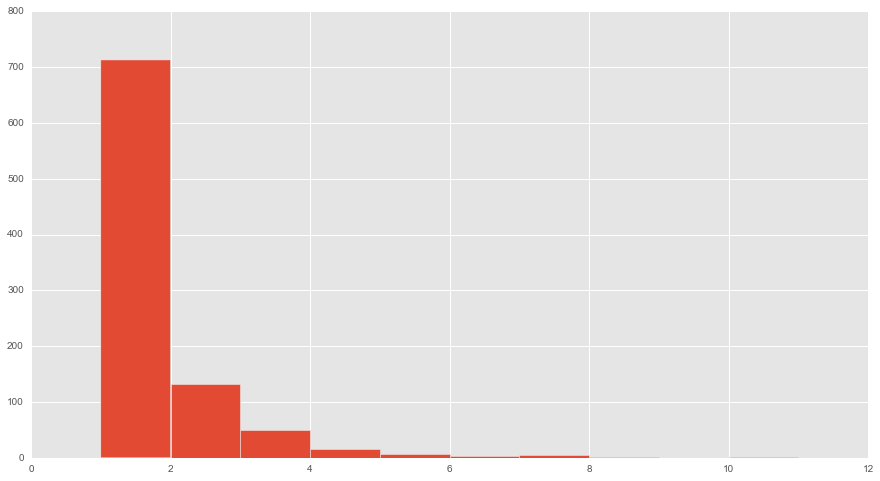

In [132]:
figure = plt.figure(figsize=(15,8))
plt.hist(groupSurvival['group_size'])
plt.xlabel('')
#plt.xlabel('Group Size')
#plt.ylabel('Frequency')
#plt.title("Distribution of Group Sizes")

In [133]:
groupSurvival['group_size'].value_counts(sort=False)

1     713
2     132
3      49
4      16
5       7
6       4
7       5
8       2
11      1
Name: group_size, dtype: int64

In [134]:
groupSurvival['family'] = 1.0*((groupSurvival['group_size'] > 1) & (groupSurvival['num_unique_names'] == 1))
familySurvival = groupSurvival.groupby('family').sum()
familySurvival['Survival Rate (%)'] = familySurvival['survived'] / familySurvival['group_size']
familySurvival.reset_index(inplace=True)
familySurvival['Group Type'] = ['Individuals/Friends','Families']
familySurvival.set_index('Group Type', inplace=True)
familySurvival

,family,group_size,num_unique_names,survived,Survival Rate (%)
Group Type,,,,,
Individuals/Friends,0.0,918,875,301,0.327887
Families,1.0,391,149,199,0.508951


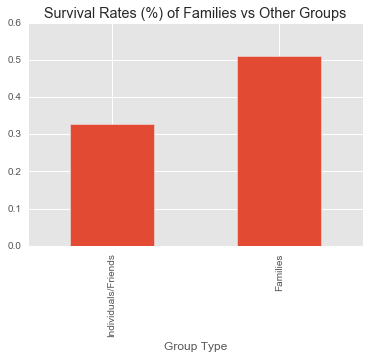

In [135]:
fam_survive = familySurvival['Survival Rate (%)'].plot(y='Survival Rate (%)', \
                                                       title='Survival Rates (%) of Families vs Other Groups', kind='bar')

In [136]:
groupSurvival['group_type'] = 1.0*(groupSurvival['group_size'] > 1)
groupSurvival['group_type'] = groupSurvival['group_type'] + groupSurvival['family']
groupSurvival #0 == individual, 1 == friends group, 2 == family

,ticket,group_size,num_unique_names,survived,family,group_type
0,110152,3,3,3,0.0,1.0
1,110413,3,1,2,1.0,2.0
2,110465,2,2,0,0.0,1.0
3,110469,1,1,0,0.0,0.0
4,110489,1,1,0,0.0,0.0
5,110564,1,1,1,0.0,0.0
6,110813,2,1,1,1.0,2.0
7,111163,1,1,1,0.0,0.0
8,111240,1,1,0,0.0,0.0
9,111320,1,1,0,0.0,0.0


In [137]:
groupsVsIndividuals = groupSurvival.groupby('group_type').sum()
groupsVsIndividuals['Survival Rate (%)'] = groupsVsIndividuals['survived'] / groupsVsIndividuals['group_size']
groupsVsIndividuals.reset_index(inplace=True)
groupsVsIndividuals['Group Type'] = ['Individuals', 'Friends', 'Families']
groupsVsIndividuals.set_index('Group Type', inplace=True)
groupsVsIndividuals

,group_type,group_size,num_unique_names,survived,family,Survival Rate (%)
Group Type,,,,,,
Individuals,0.0,713,713,194,0.0,0.272090
Friends,1.0,205,162,107,0.0,0.521951
Families,2.0,391,149,199,149.0,0.508951


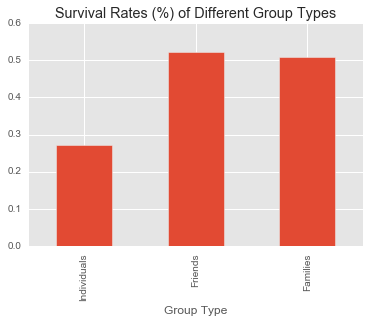

In [138]:
group_survive = groupsVsIndividuals['Survival Rate (%)'].plot(y='Survival Rate (%)', \
                                                       title='Survival Rates (%) of Different Group Types', kind='bar')

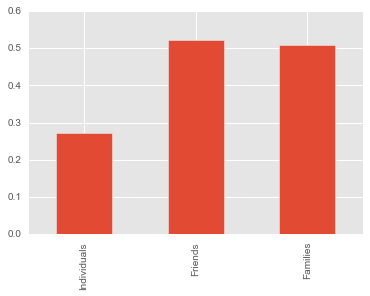

In [139]:
plt.figure()
group_survive = groupsVsIndividuals['Survival Rate (%)'].plot(kind='bar')
plt.xlabel('')

In [140]:
groupSurvival['Survival Rate (%)'] = groupSurvival['survived'] /groupSurvival['group_size']
#survivalByGroupSize = groupSurvival.groupby('group_size')['Survival Rate (%)'].hist(stacked=False)

In [141]:
pd.DataFrame(groupSurvival.groupby('group_size')['Survival Rate (%)'].mean())

,Survival Rate (%)
group_size,
1,0.272090
2,0.507576
3,0.625850
4,0.703125
5,0.371429
6,0.291667
7,0.257143
8,0.375000
11,0.000000


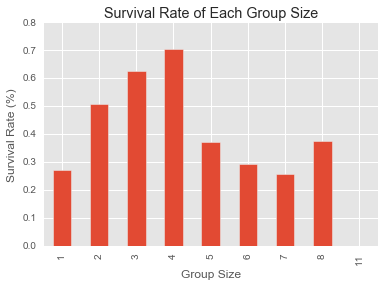

In [142]:
plt.figure()
groupSurvival.groupby('group_size')['Survival Rate (%)'].mean().plot(kind='bar')
plt.title('Survival Rate of Each Group Size')
plt.xlabel('Group Size')
plt.ylabel('Survival Rate (%)')

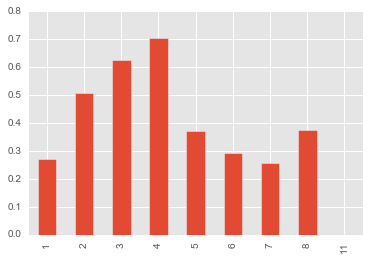

In [143]:
plt.figure()
groupSurvival.groupby('group_size')['Survival Rate (%)'].mean().plot(kind='bar')
#plt.title('Survival Rate of Each Group Size')
plt.xlabel('')
#plt.ylabel('Survival Rate (%)')

## Parents vs Children
* Did parents tend to sacrifice themselves for their children?

In [144]:
titanicFamilies = transformedTitanic[transformedTitanic['parch'] > 0]
titanicFamilies.sort('last_name', inplace=True)
titanicFamilies['child'] = 1.0*(titanicFamilies['age'] <= 18)
titanicFamilies.groupby(['last_name','child']).agg({'survived':sum,'ticket_counts':np.mean})
#baxter

ticket_counts  survived
last_name    child                         
Abbott       0.0         3.000000         1
             1.0         3.000000         0
Aks          1.0         2.000000         2
Allison      0.0         6.000000         0
             1.0         6.000000         1
Andersson    0.0         5.000000         0
             1.0         6.000000         1
Asplund      0.0         7.000000         1
             1.0         7.000000         2
Baclini      0.0         4.000000         1
             1.0         4.000000         3
Barbara      0.0         2.000000         0
             1.0         2.000000         0
Baxter       0.0         3.000000         1
Becker       0.0         4.000000         1
             1.0         4.000000         3
Beckwith     0.0         2.000000         2
Boulos       0.0         3.000000         0
             1.0         3.000000         0
Bourke       0.0         1.666667         0
Bowerman     0.0         2.000000         1
Brown        0.0         3.000000         1
             1.0         3.000000         1
Caldwell     0.0         3.000000         2
             1.0         3.000000         1
Cardeza      0.0         4.000000         2
Carter       0.0         4.000000         2
             1.0         4.000000         2
Chibnall     0.0         2.000000         1
Christy      0.0         2.000000         2
...                           ...       ...
Sage         1.0        11.000000         0
Sandstrom    0.0         3.000000         1
             1.0         3.000000         2
Shelley      0.0         2.000000         1
Silven       1.0         1.000000         1
Skoog        0.0         6.000000         0
             1.0         6.000000         0
Spedden      0.0         5.000000         2
             1.0         5.000000         1
Strom        0.0         2.000000         0
             1.0         2.000000         0
Taussig      0.0         3.000000         1
             1.0         3.000000         1
Thayer       0.0         4.000000         1
             1.0         4.000000         1
Thomas       1.0         2.000000         2
Touma        0.0         3.000000         1
             1.0         3.000000         2
Van Impe     0.0         3.000000         0
             1.0         3.000000         0
Wells        0.0         3.000000         1
             1.0         3.000000         2
West         0.0         4.000000         1
             1.0         4.000000         2
White        0.0         2.000000         0
Wick         0.0         4.000000         2
Widener      0.0         5.000000         1
Williams     0.0         2.000000         1
van Billiard 0.0         3.000000         0
             1.0         3.000000         0

[168 rows x 2 columns]

In [145]:
def get_num_parents(ageList):
    return (ageList > 18).sum()
titanicFamilies = transformedTitanic[transformedTitanic['parch'] > 0]
parentNumbers = titanicFamilies.groupby('last_name')['age'].apply(get_num_parents).to_dict()
titanicFamilies['num_parents'] = titanicFamilies['last_name'].apply(lambda x: parentNumbers[x])

titanicFamilies['child'] = 1.0*(titanicFamilies['age'] <= 18)
titanicFamilies['surviving_children'] = titanicFamilies['child'] * titanicFamilies['survived']
parentsVsChildren = titanicFamilies.groupby('last_name').agg({'ticket_counts':np.mean, 'num_parents':np.mean, \
                                          'child':np.sum, 'surviving_children':np.sum, 'survived':np.sum})

parentsVsChildren['surviving_parents'] = parentsVsChildren['survived'] - parentsVsChildren['surviving_children']
parentsVsChildren['child survival rate'] = parentsVsChildren['surviving_children'] / parentsVsChildren['child']
parentsVsChildren['parent survival rate'] = parentsVsChildren['surviving_parents'] / parentsVsChildren['num_parents']
parentsVsChildren

,num_parents,child,ticket_counts,surviving_children,survived,surviving_parents,child survival rate,parent survival rate
last_name,,,,,,,,
Abbott,1,2.0,3.000000,0.0,1,1.0,0.000000,1.000000
Aks,0,2.0,2.000000,2.0,2,0.0,1.000000,NaN
Allison,2,2.0,6.000000,1.0,1,0.0,0.500000,0.000000
Andersson,3,6.0,5.666667,1.0,1,0.0,0.166667,0.000000
Asplund,2,5.0,7.000000,2.0,3,1.0,0.400000,0.500000
Baclini,1,3.0,4.000000,3.0,4,1.0,1.000000,1.000000
Barbara,1,1.0,2.000000,0.0,0,0.0,0.000000,0.000000
Baxter,2,0.0,3.000000,0.0,1,1.0,NaN,0.500000
Becker,1,3.0,4.000000,3.0,4,1.0,1.000000,1.000000


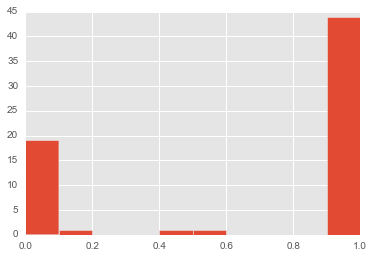

In [146]:
parentsVsChildren['child survival rate'].hist()

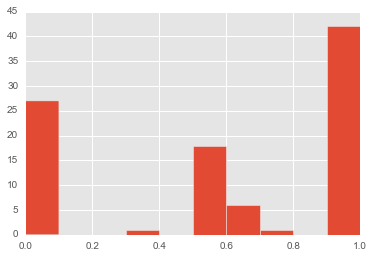

In [147]:
parentsVsChildren = parentsVsChildren.replace(np.inf, np.nan)
parentsVsChildren['parent survival rate'].hist()

In [148]:
transformedTitanic[transformedTitanic['ticket'] == '11751']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,ticket_counts,individual_fare,last_name
20,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY",2,26.2771,Beckwith
21,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY",2,26.2771,Beckwith


## What does the ticket prefix mean?

In [150]:
def get_ticket_prefix(ticket):
    ticket = ticket.upper()
    ticketComponents = ticket.split(" ")
    if len(ticketComponents) > 1:
        prefix = ticketComponents[0]
        prefix = prefix.split(".")
        prefix = "".join(prefix)
        return prefix
    else:
        return np.nan

In [151]:
ticketPrefixes = transformedTitanic['ticket'].apply(get_ticket_prefix)
ticketPrefixes.describe()

count     348
unique     38
top        PC
freq       92
Name: ticket, dtype: object

In [152]:
ticketPrefixes.isnull().sum()

961

In [153]:
ticketPrefixes.value_counts(ascending=False)

PC          92
CA          68
A/5         25
SOTON/OQ    24
SC/PARIS    19
W/C         15
STON/O      14
FCC          9
A/4          9
C            8
SOC          7
STON/O2      7
SO/PP        7
SC/AH        5
PP           4
FC           3
SOTON/O2     3
A5           3
SW/PP        2
P/PP         2
SC           2
WE/P         2
SC/A4        2
WEP          2
STON/OQ      1
AQ/4         1
SO/C         1
A/S          1
CA/SOTON     1
LP           1
SC/A3        1
SP           1
FA           1
SCO/W        1
AQ/3         1
A            1
SOP          1
A4           1
Name: ticket, dtype: int64

In [154]:
transformedTitanic['ticket_prefix'] = transformedTitanic['ticket'].apply(get_ticket_prefix)

In [155]:
ticketPrefix1 = transformedTitanic.groupby('ticket_prefix').agg({'survived': np.mean, 'pclass': np.mean})
ticketPrefix2 = transformedTitanic.groupby('ticket_prefix').count()
ticketPrefix2 = ticketPrefix2.drop(['pclass','survived'],axis=1)
ticketPrefix2 = ticketPrefix2.join(ticketPrefix1)
ticketPrefixAnalysis = ticketPrefix2[['last_name','survived','pclass']]
ticketPrefixAnalysis.columns = ['count','survived','pclass']
ticketPrefixAnalysis.sort(columns='count', ascending=False, inplace=True)
ticketPrefixAnalysis

,count,survived,pclass
ticket_prefix,,,
PC,92,0.630435,1.000000
CA,68,0.338235,2.514706
A/5,25,0.080000,3.000000
SOTON/OQ,24,0.166667,3.000000
SC/PARIS,19,0.578947,2.000000
W/C,15,0.200000,2.666667
STON/O,14,0.357143,3.000000
FCC,9,0.555556,2.000000
A/4,9,0.111111,3.000000


## Did lower class passengers tend to have less information documented?

In [156]:
missingValues = 1.0*transformedTitanic.apply(pd.isnull)
missingValues['pclass'] = transformedTitanic['pclass']
missingValues = missingValues[['pclass','survived','name','sex','age','sibsp','parch','ticket','fare','cabin','embarked','home.dest']]
missingValues = missingValues.groupby('pclass').mean()
missingValues

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
pclass,,,,,,,,,,,
1,0.0,0.0,0.0,0.120743,0.0,0.0,0.0,0.00000,0.207430,0.006192,0.105263
2,0.0,0.0,0.0,0.057762,0.0,0.0,0.0,0.00000,0.916968,0.000000,0.057762
3,0.0,0.0,0.0,0.293371,0.0,0.0,0.0,0.00141,0.977433,0.000000,0.724965


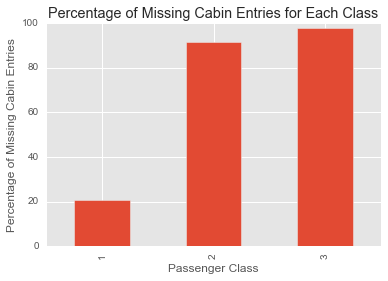

In [157]:
plt.figure()
(100*missingValues['cabin']).plot(kind='bar')
plt.title('Percentage of Missing Cabin Entries for Each Class')
plt.xlabel('Passenger Class')
plt.ylabel('Percentage of Missing Cabin Entries')

In [158]:
missingValues2 = 1.0*transformedTitanic.apply(pd.isnull)
missingValues2['pclass'] = transformedTitanic['pclass']
missingValues2['survived'] = transformedTitanic['survived']
missingValues2 = missingValues2[['pclass', 'survived','age','fare','cabin','embarked', 'boat', 'body','home.dest']]
missingValues2.groupby(['pclass','survived']).mean()

age      fare     cabin  embarked      boat      body  \
pclass survived                                                               
1      0         0.162602  0.000000  0.276423      0.00  0.983740  0.715447   
       1         0.095000  0.000000  0.165000      0.01  0.005000  1.000000   
2      0         0.075949  0.000000  0.962025      0.00  0.993671  0.803797   
       1         0.033613  0.000000  0.857143      0.00  0.067227  1.000000   
3      0         0.299242  0.001894  0.986742      0.00  0.988636  0.895833   
       1         0.276243  0.000000  0.950276      0.00  0.077348  1.000000   

                 home.dest  
pclass survived             
1      0          0.073171  
       1          0.125000  
2      0          0.088608  
       1          0.016807  
3      0          0.734848  
       1          0.696133

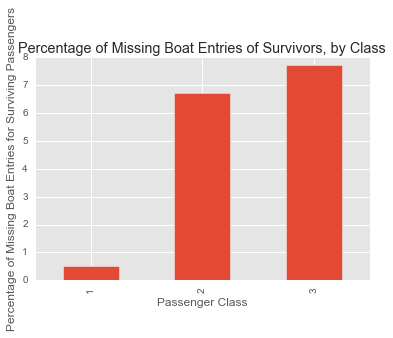

In [159]:
missingValues3 = missingValues2[missingValues2['survived']==1].groupby('pclass').mean()
plt.figure()
(100*missingValues3['boat']).plot(kind='bar')
plt.title('Percentage of Missing Boat Entries of Survivors, by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Percentage of Missing Boat Entries for Surviving Passengers')

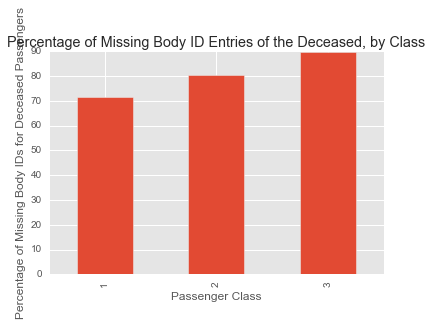

In [160]:
missingValues4 = missingValues2[missingValues2['survived']==0].groupby('pclass').mean()
plt.figure()
(100*missingValues4['body']).plot(kind='bar')
plt.title('Percentage of Missing Body ID Entries of the Deceased, by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Percentage of Missing Body IDs for Deceased Passengers')

### EDA for Boat, Cabin, Home.Dest, and Embarked variables 

In [161]:
titanic = data.copy()
#titanic = pd.read_csv('./titanic.csv', index_col=False)

### Boat Variable
1. 824 missing values
2. Almost everyone who was in a boat survived. Only 9 people recorded in boats died. 
3. 23 people don't have a boat record but survived. Possible no-shows?
4. The interactive plot let's you see the composition of each boat

In [5]:
titanic['boat'].describe()

count     486
unique     27
top        13
freq       39
Name: boat, dtype: object

In [6]:
#missing values
titanic['boat'].isnull().sum()

824

In [7]:
# Most of missing values in boat are third class (More likely to die)
titanic[titanic['boat'].isnull()].groupby('pclass').size()

pclass
1.0    122
2.0    165
3.0    536
dtype: int64

In [8]:
# Similarly most of missing values in boat are also male (More likely to die)
titanic[titanic['boat'].isnull()].groupby('sex').size()

sex
female    147
male      676
dtype: int64

In [9]:
#unique boats. Individuals w/ more than one boat recorded will have first one assigned in new variable
titanic['boat'].value_counts()

13         39
C          38
15         37
14         33
4          31
10         29
5          27
3          26
11         25
9          25
7          23
16         23
8          23
D          20
6          20
12         19
2          13
A          11
B           9
1           5
13 15       2
5 7         2
C D         2
8 10        1
13 15 B     1
5 9         1
15 16       1
Name: boat, dtype: int64

In [162]:
#class composition of boats
titanic[titanic['boat'].notnull()].groupby('pclass').size()

pclass
1.0    201
2.0    112
3.0    173
dtype: int64

In [164]:
#percentages of each class taken onto boats
boat_class = titanic[titanic['boat'].notnull()].groupby('pclass').agg({'pclass':'count'})#, 'sum', 'mean']})
class_table = titanic.groupby('pclass').agg({'pclass':'count'})
#embarked_graph = titanic.groupby('embarked').agg({'survived':'mean'})
boat_class['percent taken'] = boat_class['pclass']/class_table['pclass']

In [165]:
boat_class

,pclass,percent taken
pclass,,
1.0,201,0.622291
2.0,112,0.404332
3.0,173,0.244006


In [166]:
#survivorship, class composition of boats
titanic.groupby(['survived', 'pclass', 'boat']).size()

survived  pclass  boat   
0.0       1.0     14          1
                  A           1
          2.0     12          1
          3.0     A           3
                  B           1
                  C           1
                  D           1
1.0       1.0     1           5
                  10          8
                  11          6
                  13          1
                  14          4
                  15          1
                  2           7
                  3          26
                  4          24
                  5          27
                  5 7         2
                  5 9         1
                  6          19
                  7          22
                  8          23
                  8 10        1
                  9           6
                  A           2
                  B           3
                  C           2
                  D           9
          2.0     10         15
                  11         14
              

In [167]:
#people who died despite being on a boat
titanic.loc[(titanic['survived'] == 0) & titanic['boat'].notnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
19,1.0,0.0,"Beattie, Mr. Thomson",male,36.0,0.0,0.0,13050,75.2417,C6,C,A,NaN,"Winnipeg, MN"
166,1.0,0.0,"Hoyt, Mr. William Fisher",male,NaN,0.0,0.0,PC 17600,30.6958,NaN,C,14,NaN,"New York, NY"
544,2.0,0.0,"Renouf, Mr. Peter Henry",male,34.0,1.0,0.0,31027,21.0000,NaN,S,12,NaN,"Elizabeth, NJ"
655,3.0,0.0,"Backstrom, Mr. Karl Alfred",male,32.0,1.0,0.0,3101278,15.8500,NaN,S,D,NaN,"Ruotsinphytaa, Finland New York, NY"
853,3.0,0.0,"Harmer, Mr. Abraham (David Lishin)",male,25.0,0.0,0.0,374887,7.2500,NaN,S,B,NaN,NaN
921,3.0,0.0,"Keefe, Mr. Arthur",male,NaN,0.0,0.0,323592,7.2500,NaN,S,A,NaN,NaN
968,3.0,0.0,"Lindell, Mr. Edvard Bengtsson",male,36.0,1.0,0.0,349910,15.5500,NaN,S,A,NaN,NaN
969,3.0,0.0,"Lindell, Mrs. Edvard Bengtsson (Elin Gerda Per...",female,30.0,1.0,0.0,349910,15.5500,NaN,S,A,NaN,NaN
1299,3.0,0.0,"Yasbeck, Mr. Antoni",male,27.0,1.0,0.0,2659,14.4542,NaN,C,C,NaN,NaN


In [168]:
#people who survived, but don't have a boat record (perhaps no-shows?)
titanic.loc[(titanic['survived'] == 1) & titanic['boat'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
192,1.0,1.0,"Lurette, Miss. Elise",female,58.0,0.0,0.0,PC 17569,146.5208,B80,C,NaN,NaN,NaN
358,2.0,1.0,"Bystrom, Mrs. (Karolina)",female,42.0,0.0,0.0,236852,13.0000,NaN,S,NaN,NaN,"New York, NY"
395,2.0,1.0,"Doling, Miss. Elsie",female,18.0,0.0,1.0,231919,23.0000,NaN,S,NaN,NaN,Southampton
396,2.0,1.0,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0.0,1.0,231919,23.0000,NaN,S,NaN,NaN,Southampton
458,2.0,1.0,"Ilett, Miss. Bertha",female,17.0,0.0,0.0,SO/C 14885,10.5000,NaN,S,NaN,NaN,Guernsey
489,2.0,1.0,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1.0,0.0,SC/AH 3085,26.0000,NaN,S,NaN,NaN,"Weston-Super-Mare, Somerset"
513,2.0,1.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1.0,0.0,237736,30.0708,NaN,C,NaN,NaN,"New York, NY"
545,2.0,1.0,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.0,3.0,0.0,31027,21.0000,NaN,S,NaN,NaN,"Elizabeth, NJ"
572,2.0,1.0,"Trout, Mrs. William H (Jessie L)",female,28.0,0.0,0.0,240929,12.6500,NaN,S,NaN,NaN,"Columbus, OH"
656,3.0,1.0,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3.0,0.0,3101278,15.8500,NaN,S,NaN,NaN,"Ruotsinphytaa, Finland New York, NY"


In [169]:
#Function to add colum w/ only first boat (when more than one is available)
def boat_f(boat):
    if str(boat)[0:1] == 'n':
        return ''
    else:
        return str(boat)[0:2]
        
titanic['boatf'] = list(map(boat_f, titanic['boat']))


In [170]:
titanic['boatf'].value_counts()

      824
13     42
15     38
C      38
14     33
4      31
10     29
5      27
3      26
9      25
11     25
16     23
8      23
7      23
D      20
6      20
12     19
2      13
A      11
B       9
1       5
5       3
C       2
8       1
Name: boatf, dtype: int64

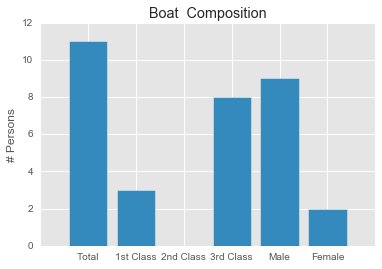

In [172]:
from ipywidgets import widgets, interactive
boat_list = titanic['boat'].unique()
boat_count = widgets.Dropdown(
    options = list(boat_list),#titanic['embarked'].unique()),
    value = '2',
    description='Boat:'
)

def plotit(boat_count):
    boat_df = titanic[(titanic['boat'] == str(boat_count))]
    count = boat_df['boat'].count()
    f_class = boat_df[boat_df['pclass']==1]['pclass'].count()
    s_class = boat_df[boat_df['pclass']==2]['pclass'].count()
    t_class = boat_df[boat_df['pclass']==3]['pclass'].count()
    male = boat_df[boat_df['sex']=='male']['sex'].count()
    female = boat_df[boat_df['sex']=='female']['sex'].count()
    
    frame = [count, f_class, s_class, t_class, male, female]
    count_df = pd.DataFrame(frame)
    
    y_pos = np.arange(len(frame))
    plt.bar(y_pos, frame, align='center',)
    plt.ylabel('# Persons')
    plt.title('Boat  Composition')
    ticks = ['Total', '1st Class', '2nd Class', '3rd Class', 'Male', 'Female']
    plt.xticks(y_pos, ticks)
   
    
interactive(plotit, boat_count=boat_count)

### Embarked Variable
1. Only 3 missing values
2. Most passengers embarked from Southampton
3. Cherbourgh has highest survival rates across all classes


In [173]:
#embarked, only 3 records missing out of 1310. Southampton was most frequent point of embarkment
titanic['embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: embarked, dtype: object

In [174]:
#embarked values
titanic['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [175]:
#rates of survivorship based on point embarked. Cornwall has highest survivorship rates
embarked_graph = titanic.groupby('embarked').agg({'survived':'mean'})
embarked_graph

,survived
embarked,
C,0.555556
Q,0.357724
S,0.332604


In [176]:
#How survival looks across points of embarkment 
titanic.groupby(['survived', 'embarked']).size()

survived  embarked
0.0       C           120
          Q            79
          S           610
1.0       C           150
          Q            44
          S           304
dtype: int64

In [177]:
#count column is total people boarded, sum is those who survivied, and mean is percentage
embarked = titanic.groupby('embarked').agg({'survived':['count','sum', 'mean']})
#embarked['survival_percentage'] = embarked['survived']['sum']/embarked['survived']['count']
embarked

survived                 
            count    sum      mean
embarked                          
C             270  150.0  0.555556
Q             123   44.0  0.357724
S             914  304.0  0.332604

In [178]:
#cross tab among all those who boarded by class and embarkment point
pd.crosstab(titanic.pclass, titanic.embarked, margins=True)

embarked,C,Q,S,All
pclass,,,,
1.0,141,3,177,321
2.0,28,7,242,277
3.0,101,113,495,709
All,270,123,914,1307


In [179]:
#pivot table displaying point of embarkment, by class and how many survived 
pd.pivot_table(titanic,index=["pclass"], columns=["embarked"], values=["survived"],aggfunc='sum')


survived             
embarked        C     Q      S
pclass                        
1.0          97.0   2.0   99.0
2.0          16.0   2.0  101.0
3.0          37.0  40.0  104.0

In [180]:
class_embarked_graph = pd.pivot_table(titanic,index=["embarked"], columns=["pclass"], values=["survived"],aggfunc='mean')


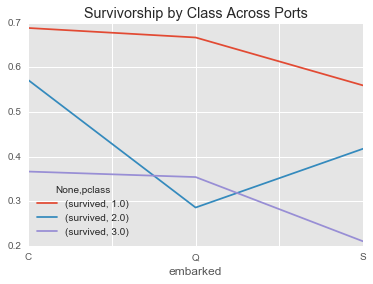

In [181]:
class_embarked_graph.plot(kind='line', title='Survivorship by Class Across Ports')

In [182]:
#point of embarkment and class cross sectoin, count is passengers boarded, sum is those survived, and mean is percentage 
#who survived. It's clear that 1st class across all points of embarkment does better
#also passengers from C have a higher survival rate across all classes
class_embarked = titanic.groupby(['pclass', 'embarked']).agg({'survived':['count','sum', 'mean']})
#class_embarked['survival_percentage'] = class_embarked['survived']['sum']/class_embarked['survived']['count']
class_embarked

survived                 
                   count    sum      mean
pclass embarked                          
1.0    C             141   97.0  0.687943
       Q               3    2.0  0.666667
       S             177   99.0  0.559322
2.0    C              28   16.0  0.571429
       Q               7    2.0  0.285714
       S             242  101.0  0.417355
3.0    C             101   37.0  0.366337
       Q             113   40.0  0.353982
       S             495  104.0  0.210101

In [183]:
#showing how boarding by class and survivorship by class percentages break down by port
#count show how the breakdown of people by class and sum shows their rates of survivorship within that port
#so someone boarding from C is likely to be in 1st class at 52% chance, their survivorship from those from C is likelty to be 65%
embarked_class_2 = titanic.groupby(['embarked', 'pclass']).agg({'survived':['count','sum']})
embarked_pct = embarked_class_2.groupby(level=0).apply(lambda x: x / (x.sum()))
embarked_pct

survived          
                    count       sum
embarked pclass                    
C        1.0     0.522222  0.646667
         2.0     0.103704  0.106667
         3.0     0.374074  0.246667
Q        1.0     0.024390  0.045455
         2.0     0.056911  0.045455
         3.0     0.918699  0.909091
S        1.0     0.193654  0.325658
         2.0     0.264770  0.332237
         3.0     0.541575  0.342105

### Body Variable
1. A mostly useless variable. Boat is better proxy
2. Only avaiable for those who died. Many missing values (1189 out of 1307)

In [184]:
#Body count hass too many null variables to be useful 
titanic['body'].isnull().sum()

1189

In [185]:
#only 121 values legitimate in body count. Useless variable and other variables serve for better story telling (ie boat)
titanic['body'].value_counts().sum()

121

In [186]:
#body counts only present who didn't survive
titanic[titanic['body'].notnull()].groupby('survived').size()

survived
0.0    121
dtype: int64

In [187]:
#body counts reflect proportion of classes i
titanic[titanic['body'].notnull()].groupby('pclass').size()

pclass
1.0    35
2.0    31
3.0    55
dtype: int64

In [188]:
# still many null values for those who didn't survive. 
titanic[titanic['body'].isnull()].groupby('survived').size()

survived
0.0    688
1.0    500
dtype: int64

In [189]:
#most null values from third class
titanic[titanic['body'].isnull()].groupby('pclass').size()

pclass
1.0    288
2.0    246
3.0    654
dtype: int64

### Cabin Variable
1. 1015 missing values
2. Creation of new variables, cabin letter, which groups cabins by their first letter (A, B, C, D, E, F, G, T). This roughly correlates to floor level
3. Interactive plot to show composition of cabin_letter by class and sex

In [190]:
titanic['cabin'].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
B96 B98            4
F2                 4
C78                4
F33                4
F4                 4
D                  4
E101               3
C101               3
E34                3
B58 B60            3
B51 B53 B55        3
A34                3
E25                2
D21                2
C52                2
C125               2
C124               2
C89                2
C31                2
B28                2
D28                2
B22                2
B49                2
C55 C57            2
C83                2
F G63              2
                  ..
A18                1
B42                1
D45                1
D40                1
D11                1
A26                1
D7                 1
A5                 1
D48                1
B80                1
C30                1
E60                1
C118               1
E12                1
B10                1
A16                1
B79          

In [191]:
#function to create new variable, cabin-letter 
def cabin_letter(cabin):
    if str(cabin)[0:1] == 'n':
        return ''
    else:
        return str(cabin)[0:1]
        
titanic['cabin_letter'] = list(map(cabin_letter, titanic['cabin']))


In [192]:
titanic['cabin_letter'].value_counts()

     1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin_letter, dtype: int64

In [193]:
#how survival breaks down by cabin. Most of those who died did not have a cabin
titanic.groupby(['survived', 'cabin_letter']).size()

survived  cabin_letter
0.0                       707
          A                11
          B                18
          C                37
          D                14
          E                11
          F                 8
          G                 2
          T                 1
1.0                       307
          A                11
          B                47
          C                57
          D                32
          E                30
          F                13
          G                 3
dtype: int64

In [194]:
# how survival breaks down between cabin and class. Most who died did nto have a cabin and were in third class. 
titanic.groupby(['survived', 'cabin_letter', 'pclass']).size()

survived  cabin_letter  pclass
0.0                     1.0        34
                        2.0       152
                        3.0       521
          A             1.0        11
          B             1.0        18
          C             1.0        37
          D             1.0        12
                        2.0         2
          E             1.0        10
                        2.0         1
          F             2.0         3
                        3.0         5
          G             3.0         2
          T             1.0         1
1.0                     1.0        33
                        2.0       102
                        3.0       172
          A             1.0        11
          B             1.0        47
          C             1.0        57
          D             1.0        28
                        2.0         4
          E             1.0        24
                        2.0         3
                        3.0         3
          F        

In [195]:
#most missing values come from those who died
titanic[titanic['cabin'].isnull()].groupby('survived').size()

survived
0.0    707
1.0    307
dtype: int64

In [196]:
# most of the missing values are from the third class
titanic[titanic['cabin'].isnull()].groupby('pclass').size()

pclass
1.0     67
2.0    254
3.0    693
dtype: int64

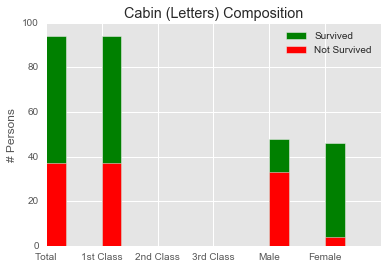

In [197]:
#Interactive plot for Cabins
def cabin_letter(cabin):
    if str(cabin)[0:1] == 'n':
        return ''
    else:
        return str(cabin)[0:1]
        
titanic['cabin_letter'] = list(map(cabin_letter, titanic['cabin']))

cabin_list = titanic['cabin_letter'].unique()
cabin_count = widgets.Dropdown(
    options = list(cabin_list),#titanic['embarked'].unique()),
    value = 'C',
    description='Cabin Letter:'
)

def plotit(cabin_count):
    cabin_df = titanic[(titanic['cabin_letter'] == str(cabin_count))]

    count_s_1 = cabin_df[cabin_df['survived']==1]['survived'].count()
    count_s_0 = cabin_df[cabin_df['survived']==0]['survived'].count()
    fclass_s_1 = cabin_df[(cabin_df['survived']==1) & (cabin_df['pclass']==1)]['survived'].count()
    fclass_s_0 = cabin_df[(cabin_df['survived']==0) & (cabin_df['pclass']==1)]['survived'].count()
    sclass_s_1 = cabin_df[(cabin_df['survived']==1) & (cabin_df['pclass']==2)]['survived'].count()
    sclass_s_0 = cabin_df[(cabin_df['survived']==0) & (cabin_df['pclass']==2)]['survived'].count()
    tclass_s_1 = cabin_df[(cabin_df['survived']==1) & (cabin_df['pclass']==3)]['survived'].count()
    tclass_s_0 = cabin_df[(cabin_df['survived']==0) & (cabin_df['pclass']==3)]['survived'].count()
    male_s_1 = cabin_df[(cabin_df['sex']=='male') & (cabin_df['survived']==1)]['survived'].count()
    male_s_0 = cabin_df[(cabin_df['sex']=='male') & (cabin_df['survived']==0)]['survived'].count()
    female_s_1 = cabin_df[(cabin_df['sex']=='female') & (cabin_df['survived']==1)]['survived'].count()
    female_s_0 = cabin_df[(cabin_df['sex']=='female') & (cabin_df['survived']==0)]['survived'].count()

    survived = [count_s_1, fclass_s_1, sclass_s_1, tclass_s_1, male_s_1, female_s_1]                                                  
    n_survived = [count_s_0, fclass_s_0, sclass_s_0, tclass_s_0, male_s_0, female_s_0]
    totals = [x + y for x, y in zip(survived, n_survived)]
    
    #print(survived)
    #print(n_survived)
    #print(totals)

    ind = np.arange(len(survived) ) 

    width = 0.35  
    p1 = plt.bar(ind, totals, width, color = 'g')
    p2 = plt.bar(ind, n_survived, width, color ='r')

    plt.ylabel('# Persons')
    plt.title('Cabin (Letters) Composition')
    ticks = ['Total', '1st Class', '2nd Class', '3rd Class', 'Male', 'Female']
    plt.xticks(ind, ticks)
    plt.legend((p1[0], p2[0]), ('Survived', 'Not Survived'))

interactive(plotit, cabin_count=cabin_count)

### Home Destination Variable 
1. 565 Values Missing
2. Variable not properly filled in. Should be written out like 'home/destination' but many record only have home. 
3. With the above assumption, create new variable home that just has first value (before slash). 
4. Top 5 home locations are NY, London, Cornwall, Montreal, and Paris

In [198]:
titanic['home.dest'].value_counts().sum()

745

In [199]:
#creation of new variable, home that takes value before slash and assumes it to be home for passenger
titanic['home'] = titanic['home.dest'].apply(lambda x: str(x).rsplit('/', 1)[0].strip())

In [200]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,boatf,cabin_letter,home
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",2,B,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",11,C,"Montreal, PQ"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",,C,"Montreal, PQ"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",,C,"Montreal, PQ"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",,C,"Montreal, PQ"


In [201]:
#value counts. Notice many nan's and sometime double occurances like Paris and Paris, France
titanic['home'].value_counts()

nan                                          565
New York, NY                                  71
London                                        27
Cornwall                                      21
Montreal, PQ                                  14
Paris                                         12
Paris, France                                 11
England                                       11
Haverford, PA                                  9
Philadelphia, PA                               8
Wiltshire, England Niagara Falls, NY           8
Winnipeg, MB                                   8
Sweden Winnipeg, MN                            7
Brooklyn, NY                                   7
Belfast                                        7
Guernsey                                       7
Sweden Worcester, MA                           5
Somerset                                       5
London, England                                5
Bulgaria Chicago, IL                           5
St Ives, Cornwall   

In [202]:
#null values
titanic['home.dest'].isnull().sum()

565

In [203]:
# are null values broken down by surival
titanic[titanic['home.dest'].isnull()].groupby('survived').size()

survived
0.0    411
1.0    153
dtype: int64

In [204]:
#most null values occur for third class passengers
titanic[titanic['home.dest'].isnull()].groupby('pclass').size()

pclass
1.0     34
2.0     16
3.0    514
dtype: int64

In [205]:
# most null values for male passengers 
titanic[titanic['home.dest'].isnull()].groupby('sex').size()

sex
female    178
male      386
dtype: int64

In [206]:
#Replacing Paris record w/ Paris, France
#titanic.home.value_counts()
titanic.loc[titanic['home'] == 'Paris'] = 'Paris, France'

#titanic.set_value('home', 'Paris', 'Paris, France')
#titanic[titanic['home']=='Paris']['home'] == 'Paris, France'

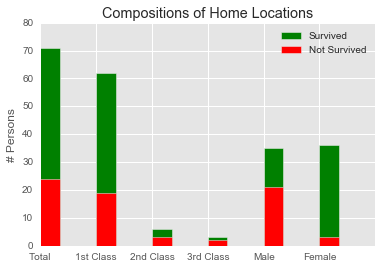

In [207]:
#this only provides home compositions of the top 6 places`
home_places = ['New York, NY', 'London', 'Paris, France', 'Cornwall', 'Montreal, PQ', 'England']

homes = widgets.Dropdown(
    options = list(home_places),#titanic['embarked'].unique()),
    value = 'New York, NY',
    description='homes'
)

def plotit(homes):
    home_df = titanic[(titanic['home'] == str(homes))]

    count_s_1 = home_df[home_df['survived']==1]['survived'].count()
    count_s_0 = home_df[home_df['survived']==0]['survived'].count()
    fclass_s_1 = home_df[(home_df['survived']==1) & (home_df['pclass']==1)]['survived'].count()
    fclass_s_0 = home_df[(home_df['survived']==0) & (home_df['pclass']==1)]['survived'].count()
    sclass_s_1 = home_df[(home_df['survived']==1) & (home_df['pclass']==2)]['survived'].count()
    sclass_s_0 = home_df[(home_df['survived']==0) & (home_df['pclass']==2)]['survived'].count()
    tclass_s_1 = home_df[(home_df['survived']==1) & (home_df['pclass']==3)]['survived'].count()
    tclass_s_0 = home_df[(home_df['survived']==0) & (home_df['pclass']==3)]['survived'].count()
    male_s_1 = home_df[(home_df['sex']=='male') & (home_df['survived']==1)]['survived'].count()
    male_s_0 = home_df[(home_df['sex']=='male') & (home_df['survived']==0)]['survived'].count()
    female_s_1 = home_df[(home_df['sex']=='female') & (home_df['survived']==1)]['survived'].count()
    female_s_0 = home_df[(home_df['sex']=='female') & (home_df['survived']==0)]['survived'].count()

    survived = [count_s_1, fclass_s_1, sclass_s_1, tclass_s_1, male_s_1, female_s_1]                                                  
    n_survived = [count_s_0, fclass_s_0, sclass_s_0, tclass_s_0, male_s_0, female_s_0]
    totals = [x + y for x, y in zip(survived, n_survived)]
    
    #print(survived)
    #print(n_survived)
    #print(totals)

    ind = np.arange(len(survived) ) 

    width = 0.35  
    p1 = plt.bar(ind, totals, width, color = 'g')
    p2 = plt.bar(ind, n_survived, width, color ='r')

    plt.ylabel('# Persons')
    plt.title('Compositions of Home Locations')
    ticks = ['Total', '1st Class', '2nd Class', '3rd Class', 'Male', 'Female']
    plt.xticks(ind, ticks)
    plt.legend((p1[0], p2[0]), ('Survived', 'Not Survived'))

interactive(plotit, homes=homes)

